In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import random
from tabulate import tabulate

In [2]:
def make_main_df_no_category(root_folder):
    
    """
    
    creates a pd.DataFrame from all the enriched verdicts
    
    :param root_folder - the folder that contains all the verdics
    
    :returns pd.DataFrame with the following atrributes:
    
        * defense, petitioners, judges, defense_attorney, petitioner_attorney and all the normalized values of them.
        * category
    
    """
    
    ids = list()
    summary = list()
    petitioner = list()
    petitioner_normalized = list()
    defense = list()
    defense_normalized = list()
    judges = list()
    judges_normalized = list()
    petitioner_attorneys = list()
    petitioner_attorneys_normalized = list()
    defense_attorneys = list()
    defense_attorneys_normalized = list()
    
    
    for verdict in os.listdir(root_folder):
        
        cur_path = root_folder + '/' + verdict
        
        with open(cur_path, 'r',encoding = 'utf-8' ) as file:
            
            verdict_json = json.load(file)
            
            ids.append(verdict_json['_id'])
            summary.append(verdict_json["_source"]["doc"]["Doc Details"]["סיכום"])
            
            petitioner.append(verdict_json["_source"]["doc"]["Doc Details"]["העותר"])
            petitioner_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['העותר מנורמל'])
            
            defense.append(verdict_json["_source"]["doc"]["Doc Details"]["המשיב"])
            defense_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['המשיב מנורמל'])
            
            judges.append(verdict_json["_source"]["doc"]["Doc Details"]["לפני"])
            judges_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['לפני מנורמל'])
            
            petitioner_attorneys.append(verdict_json["_source"]["doc"]["Doc Details"]["בשם העותר"])
            petitioner_attorneys_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['בשם העותר מנורמל'])
            
            defense_attorneys.append(verdict_json["_source"]["doc"]["Doc Details"]["בשם המשיב"])
            defense_attorneys_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['בשם המשיב מנורמל'])            


    df = pd.DataFrame(columns=['id','summary','petitioner','petitioner_normalized', 'defense', 
                               'defense_normalized', 'judges', 'judges_normalized', 'petitioner_attorneys', 
                               'petitioner_attorneys_normalized', 'defense_attorneys', 'defense_attorneys_normalized'], 
                      data = list(zip(ids, summary, petitioner, petitioner_normalized, defense, 
                                defense_normalized, judges, judges_normalized, petitioner_attorneys, 
                                petitioner_attorneys_normalized, defense_attorneys, defense_attorneys_normalized)))
    
    return df

In [3]:
def make_main_df(root_folder):
    
    """
    
    creates a pd.DataFrame from all the enriched verdicts
    
    :param root_folder - the folder that contains all the verdics
    
    :returns pd.DataFrame with the following atrributes:
    
        * defense, petitioners, judges, defense_attorney, petitioner_attorney and all the normalized values of them.
        * category
    
    """
    
    ids = list()
    summary = list()
    category = list()
    petitioner = list()
    petitioner_normalized = list()
    defense = list()
    defense_normalized = list()
    judges = list()
    judges_normalized = list()
    petitioner_attorneys = list()
    petitioner_attorneys_normalized = list()
    defense_attorneys = list()
    defense_attorneys_normalized = list()
    
    
    for verdict in os.listdir(root_folder):
        
        cur_path = root_folder + '/' + verdict
        
        with open(cur_path, 'r',encoding = 'utf-8' ) as file:
            
            verdict_json = json.load(file)
            
            ids.append(verdict_json['_id'])
            summary.append(verdict_json["_source"]["doc"]["Doc Details"]["סיכום"])
            category.append(verdict_json['_source']['doc']['Case Details']['Category'])
            
            petitioner.append(verdict_json["_source"]["doc"]["Doc Details"]["העותר"])
            petitioner_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['העותר מנורמל'])
            
            defense.append(verdict_json["_source"]["doc"]["Doc Details"]["המשיב"])
            defense_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['המשיב מנורמל'])
            
            judges.append(verdict_json["_source"]["doc"]["Doc Details"]["לפני"])
            judges_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['לפני מנורמל'])
            
            petitioner_attorneys.append(verdict_json["_source"]["doc"]["Doc Details"]["בשם העותר"])
            petitioner_attorneys_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['בשם העותר מנורמל'])
            
            defense_attorneys.append(verdict_json["_source"]["doc"]["Doc Details"]["בשם המשיב"])
            defense_attorneys_normalized.append(verdict_json["_source"]["doc"]["Doc Details"]['בשם המשיב מנורמל'])            


    df = pd.DataFrame(columns=['id','summary','category','petitioner','petitioner_normalized', 'defense', 
                               'defense_normalized', 'judges', 'judges_normalized', 'petitioner_attorneys', 
                               'petitioner_attorneys_normalized', 'defense_attorneys', 'defense_attorneys_normalized'], 
                      data = list(zip(ids, summary, category,petitioner, petitioner_normalized, defense, 
                                defense_normalized, judges, judges_normalized, petitioner_attorneys, 
                                petitioner_attorneys_normalized, defense_attorneys, defense_attorneys_normalized)))
    
    return df

In [4]:
df = make_main_df('C:/HebrewCourtVerdictsAnalyzer/ML/Pipeline Python Scripts/clas_out_after_fix')

In [5]:
not_normalized = df.drop(columns=['id','summary','petitioner_normalized','defense_normalized', 'judges_normalized', 'petitioner_attorneys_normalized', 'defense_attorneys_normalized'])

In [6]:
normalized = df.drop(columns=['id','summary','petitioner','defense', 'judges', 'petitioner_attorneys', 'defense_attorneys'])

In [7]:
petitioner = not_normalized.loc[:,'petitioner']
defense = not_normalized.loc[:,'defense']
judges = not_normalized.loc[:,'judges']
petitioner_attorneys = not_normalized.loc[:,'petitioner_attorneys']
defense_attorneys = not_normalized.loc[:,'defense_attorneys']

In [8]:
petitioner_normalized = normalized.loc[:,'petitioner_normalized']
defense_normalized = normalized.loc[:,'defense_normalized']
judges_normalized = normalized.loc[:,'judges_normalized']
petitioner_attorneys_normalized = normalized.loc[:,'petitioner_attorneys_normalized']
defense_attorneys_normalized = normalized.loc[:,'defense_attorneys_normalized']

In [9]:
def count_personal(df):
    
    """
    
    counts the personal names occurences on the df
    
    :params df - a pd.DataFrame
    
    :resturns - name to apperenaces dict
    
    """
    
    count_dict = dict()
    
    for row in df:
        if row != None:
            for name in row:
            
                try:
                    count_dict[name] += 1
            
                except KeyError:
                    if name != '':
                        count_dict[name] = 1
    
    return count_dict

In [10]:
def create_top_k_attenders(df,K):
    
    count_dict = count_personal(df)
    sorted_dict = {k: v for k, v in reversed(sorted(count_dict.items(), key=lambda item: item[1]))}
    dict_itemes = sorted_dict.items()
    topk = list(dict_itemes)[:K]
    names = [name[0][::-1] for name in topk]
    values = [value[1] for value in topk]
    
    return names,values

In [11]:
def plot(names,values,role):
    x_width = .5

    fig = plt.figure()
    ax = fig.add_axes([0,0,2.5,2.5])
    ax.set_ylabel('Verdicts Count',Fontsize=20)
    ax.set_title(f'Top 10 {role}',size=28)
    rect_values = list()
    for (name,value) in zip(names,values):
        rect_values.append(ax.bar(name , value, color = [(random.uniform(150,255)/255,210/255,230/255)], width =x_width))
    
    #ax.set_xticks(np.add(np.arange(len(names)),(x_width//2)))
    #ax.set_xticklabels(names,Fontsize=10)
    ax.set_xticks([])
    legends = [f'{val} : {name}' for (name,val) in zip(names,values)]
    print(legends)
    ax.legend(rect_values,legends, fontsize=20)
    for rects in rect_values:
        autolabel(ax,rects)
    
    plt.show()

In [12]:
def autolabel(ax,rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=16,color='black')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


["17022 : תויח 'א", "16951 : סינורג 'א", "15200 : שיניב 'ד", "14682 : ןמלגופ 'ע", "13964 : תימע 'י", "13689 : ןייטשניבור 'א", "12782 : ןארבו'ג 'ס", "12560 : רצלמ 'ח", "11239 : רואנ 'מ", "10807 : לדנה 'נ"]


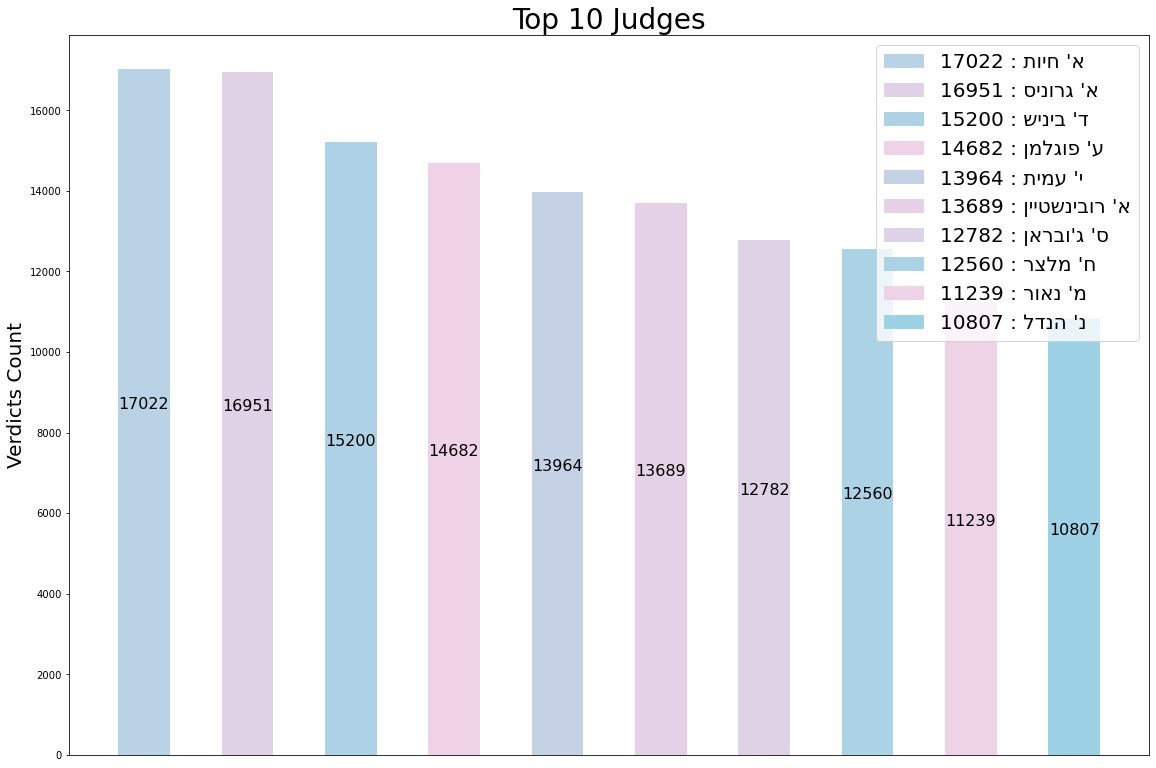

In [13]:
jn_names,jn_values = create_top_k_attenders(judges,10)
plot(jn_names,jn_values,'Judges')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['17097 : סינורג ןד רשא', '17075 : תויח רתסא', '16118 : שיניב תירוד', '14818 : רואנ םירמ', '14699 : ןמלגופ יזוע', '13981 : תימע קחצי', '13726 : ןייטשניבור םיקילא', '12803 : ןארבוג םילס', '12566 : רצלמ ןנח', '11059 : ןילביר רזעילא']


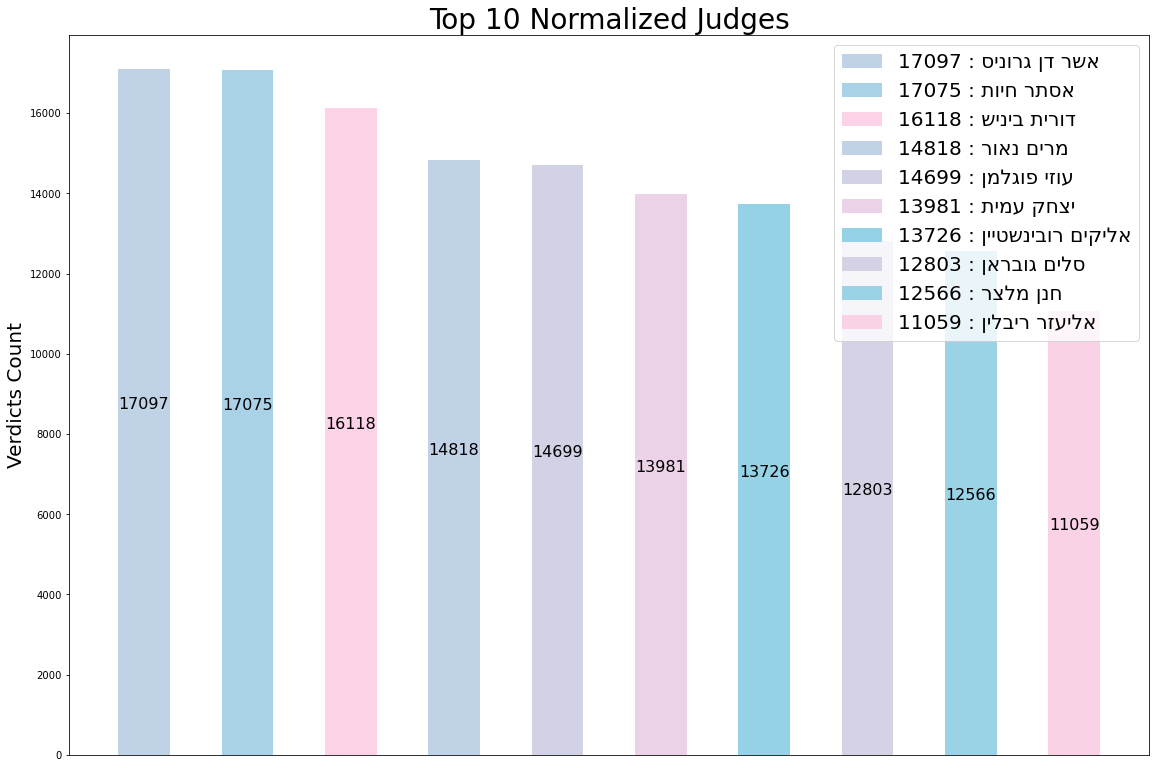

In [14]:
j_names,j_values = create_top_k_attenders(judges_normalized,10)
plot(j_names,j_values,'Normalized Judges')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['13851 : ינולפ', '12345 : לארשי תנידמ', '4639 : תינולפ', '2262 : רגרבצלז הטול ר"ד לש הדוסימ טרפה תנגהל דקומה', '1356 : לארשי תנידמ ', '650 : ומצעב ', '627 : לארשיב חרזאה תויוכזל הדוגאה', '479 : ומצעב', '456 : מ"עב חוטיבל הרבח סקינפה', '409 : טרפה תנגהל דקומה']


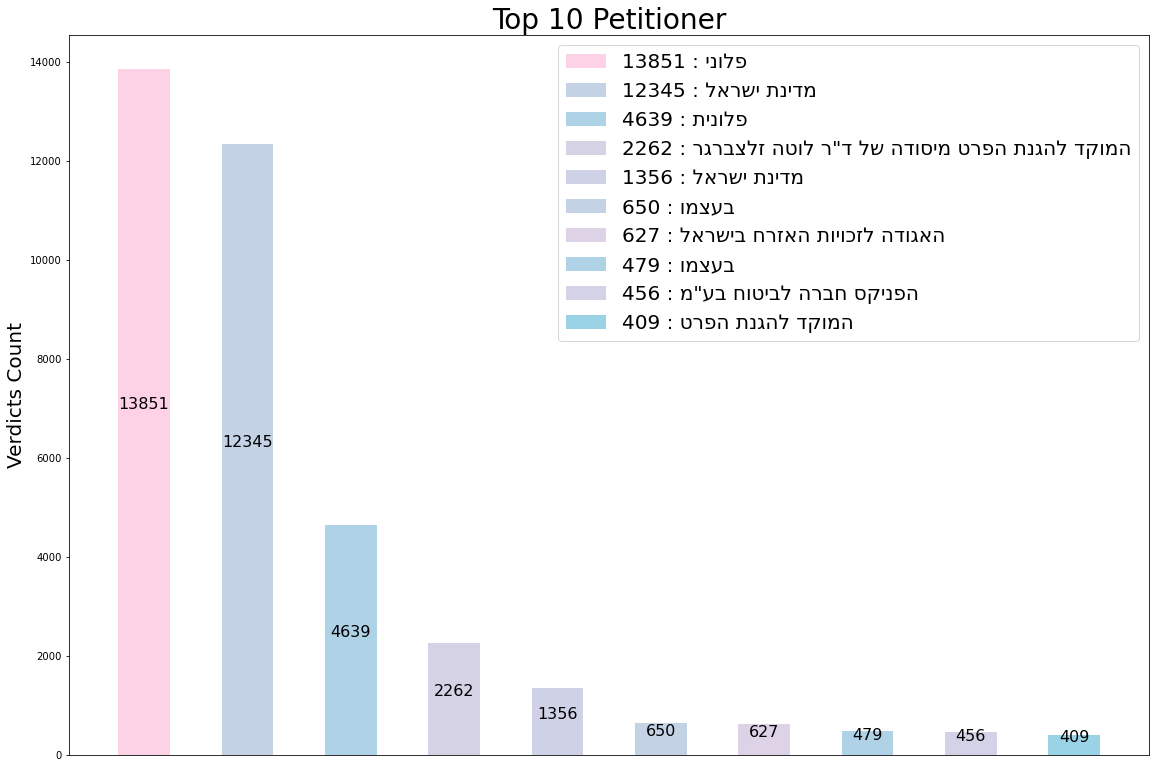

In [15]:
pn_names,pn_values = create_top_k_attenders(petitioner,10)
plot(pn_names,pn_values,'Petitioner')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['14213 : ינולפ', '13736 : לארשי תנידמ', '4738 : תינולפ', '2304 : רגרבצלז הטול ר"ד לש הדוסימ טרפה תנגהל דקומה', '1129 : ומצעב', '779 : לארשיב חרזאה תויוכזל הדוגאה', '536 : טרפה תנגהל דקומה', '463 : מ"עב חוטיבל הרבח סקינפה', '435 : לארשיב ןוטלשה תוכיא ןעמל העונתה', '353 : מ"עב חוטיבל הרבח ללכ']


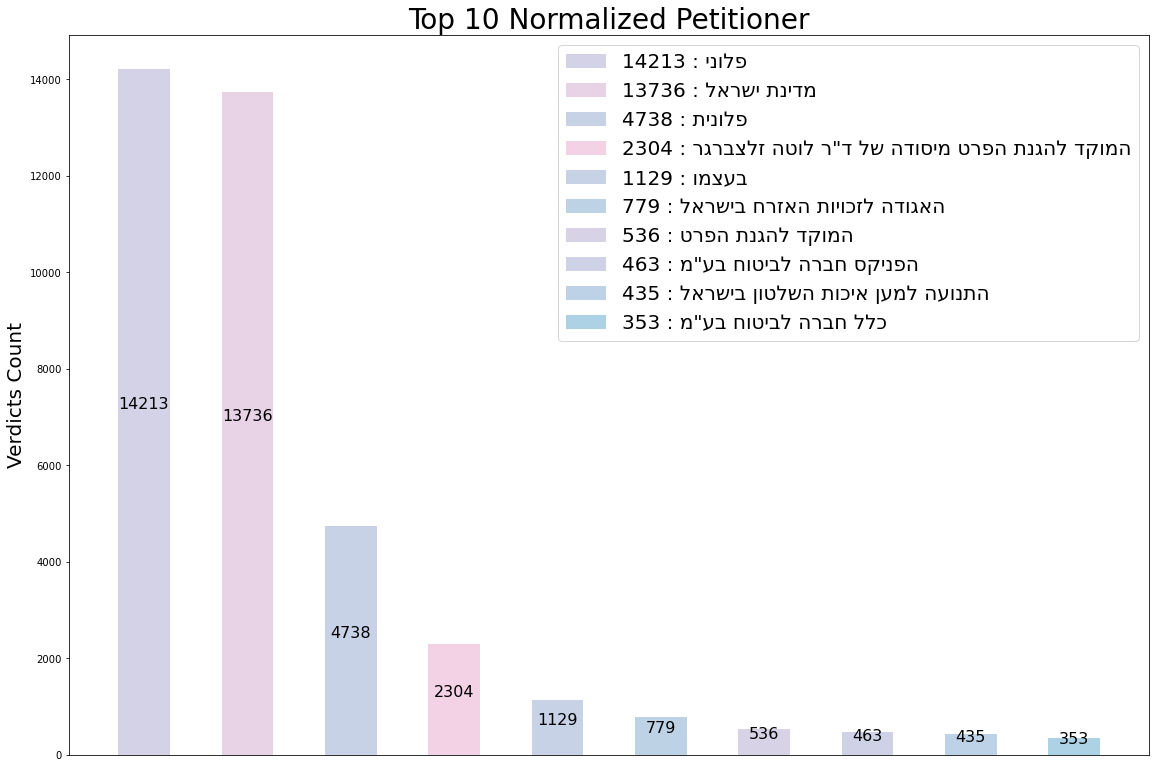

In [16]:
p_names,p_values = create_top_k_attenders(petitioner_normalized,10)
plot(p_names,p_values,'Normalized Petitioner')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['34140 : לארשי תנידמ', '9996 : םינפה רש', '9001 : ינולפ', '6759 : ךילה שגוה', '5432 : םינפה דרשמ', '5400 : לארשי תנידמ ', '5230 : ימשרה םיסכנה סנוכ', '4396 : הלשממל יטפשמה ץעויה', '2834 : תינולפ', '2641 : ןוחטיבה רש']


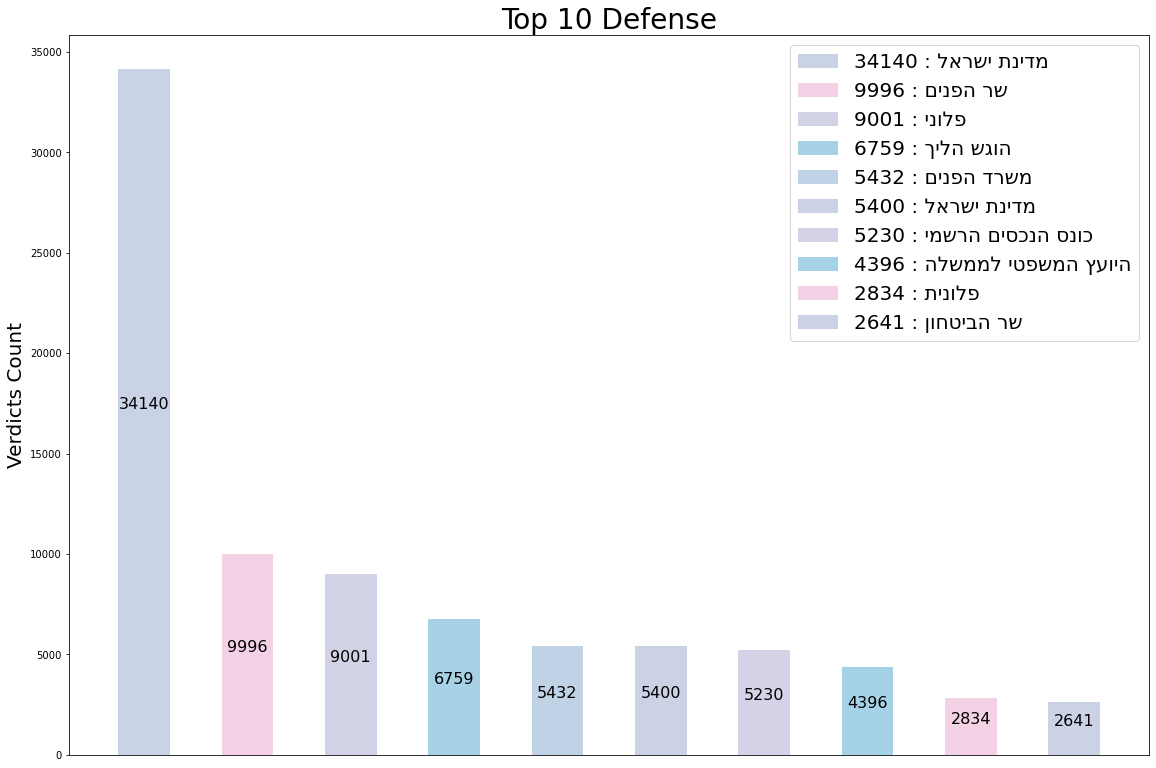

In [17]:
dn_names,dn_values = create_top_k_attenders(defense,10)
plot(dn_names,dn_values,'Defense')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['40230 : לארשי תנידמ', '12575 : םינפה רש', '9173 : ינולפ', '6759 : ךילה שגוה', '6074 : םינפה דרשמ', '5915 : הלשממל יטפשמה ץעויה', '5662 : ימשרה םיסכנה סנוכ', '2900 : תינולפ', '2881 : לארשי תרטשמ', '2835 : ןוחטיבה רש']


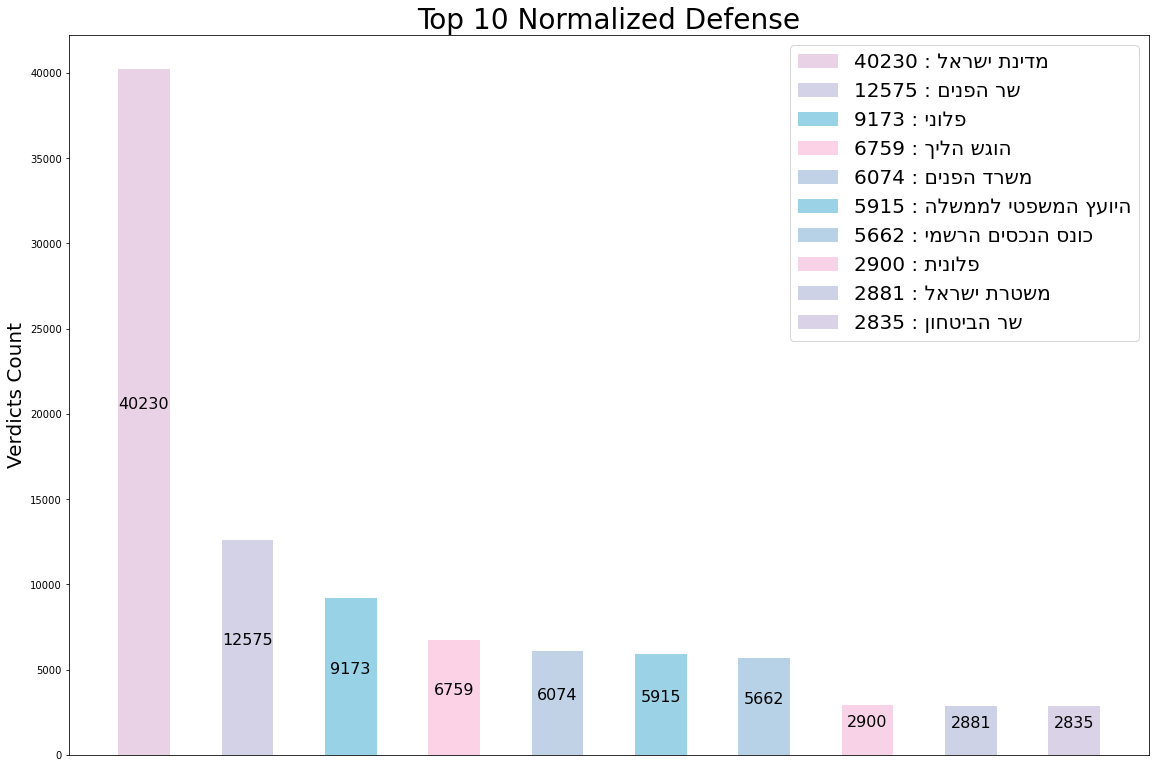

In [18]:
d_names,d_values = create_top_k_attenders(defense_normalized,10)
plot(d_names,d_values,'Normalized Defense')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['6247 : ומצעב ', '3656 : ומצעב', '927 : המצעב ', '682 : המצעב', '469 : הנינס ובא ףרשא ד"וע', '426 : םמצעב ', '379 : םמצעב', '307 : ןמדלפ רודגיבא ד"וע', '239 : לטנזור הרדנא ד"וע ', '236 : ןיראב\'ג דומחמ ד"וע']


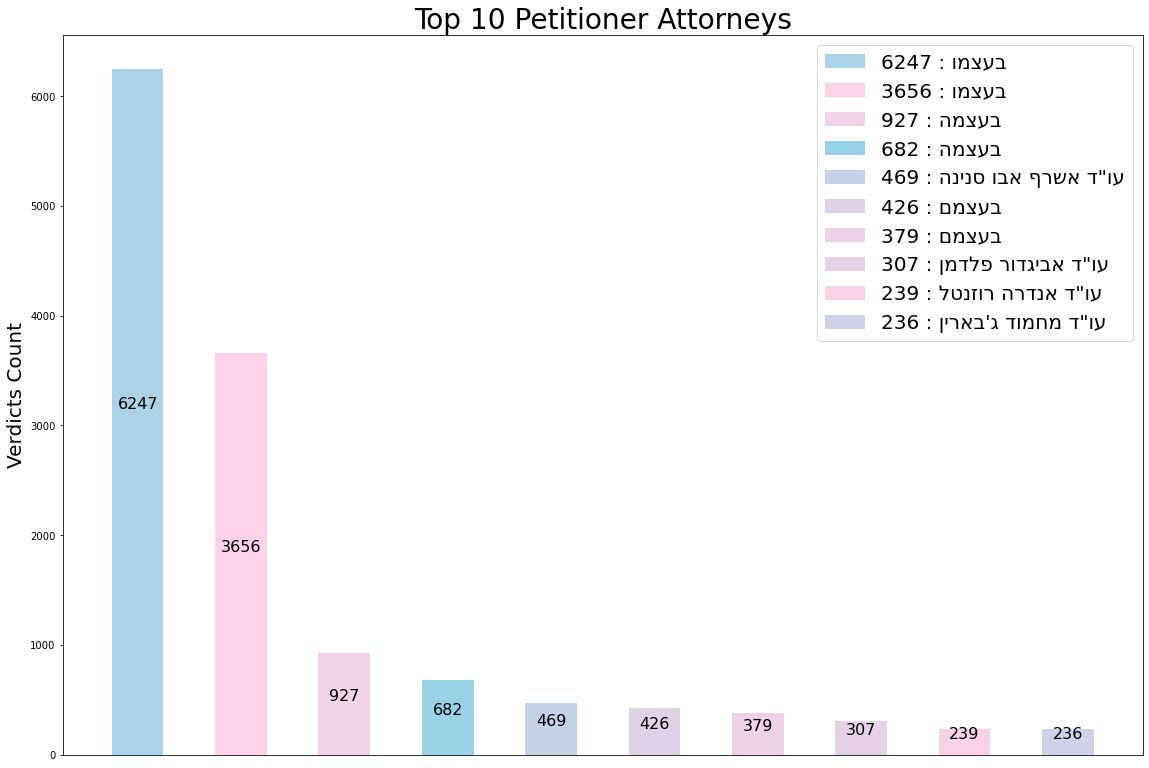

In [19]:
pan_names,pan_values = create_top_k_attenders(petitioner_attorneys,10)
plot(pan_names,pan_values,'Petitioner Attorneys')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['9926 : ומצעב', '1614 : המצעב', '820 : םמצעב', '550 : ןמדלפ רודגיבא', '453 : ןלוג דוד', '411 : לטנזור הרדנא', '398 : ןיראבג דומחמ', '330 : למצ האל', '308 : אגרש דעילא', '289 : ןועבג סומע']


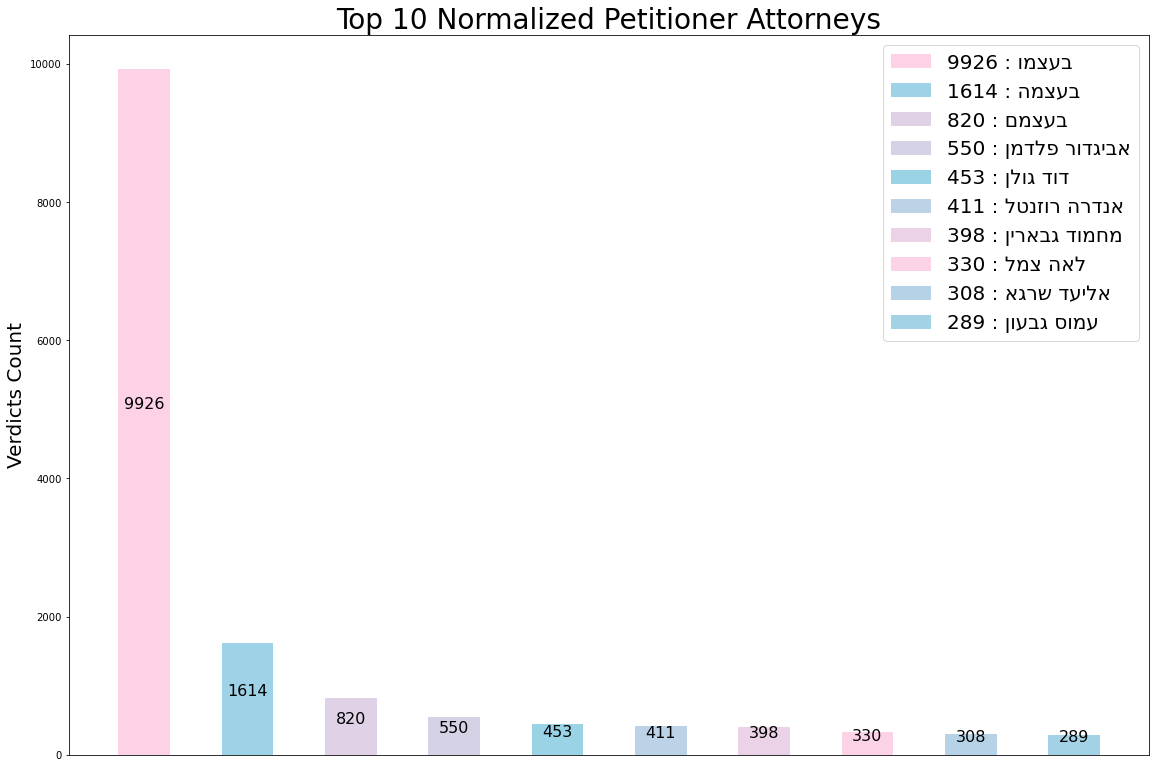

In [20]:
pa_names,pa_values = create_top_k_attenders(petitioner_attorneys_normalized,10)
plot(pa_names,pa_values,'Normalized Petitioner Attorneys')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['969 : ומצעב', '747 : הקיוש יעור ד"וע', '668 : טרב קחצי ד"וע', '612 : ןמלה רנע ד"וע', '606 : סקראמ לאינד ד"וע', '539 : הקיוש יחיבא-יעור ד"וע', '530 : ומצעב ', '525 : ןרע סדה ד"וע', '506 : גרבנזור ןר ד"וע', '495 : ןתיא ידוא ד"וע']


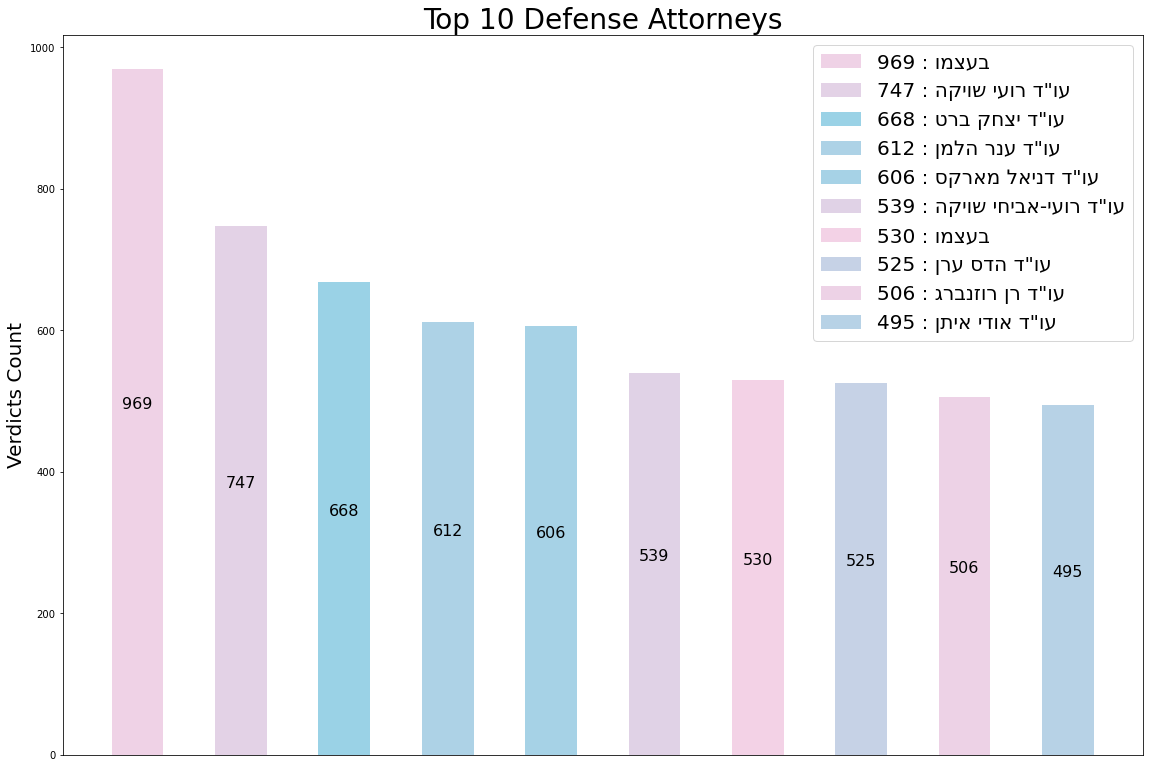

In [21]:
dan_names,dan_values = create_top_k_attenders(defense_attorneys,10)
plot(dan_names,dan_values,'Defense Attorneys')

<ipython-input-11-cb38a4f16e6e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Verdicts Count',Fontsize=20)


['1513 : ומצעב', '1000 : ןמלה רנע', '996 : הקיוש יעור', '884 : טרב קחצי', '798 : סקראמ לאינד', '623 : ןרע סדה', '614 : ןתיא ידוא', '614 : גרבנזור ןר', '609 : ןמריש דעלג', '592 : קפוא ינח']


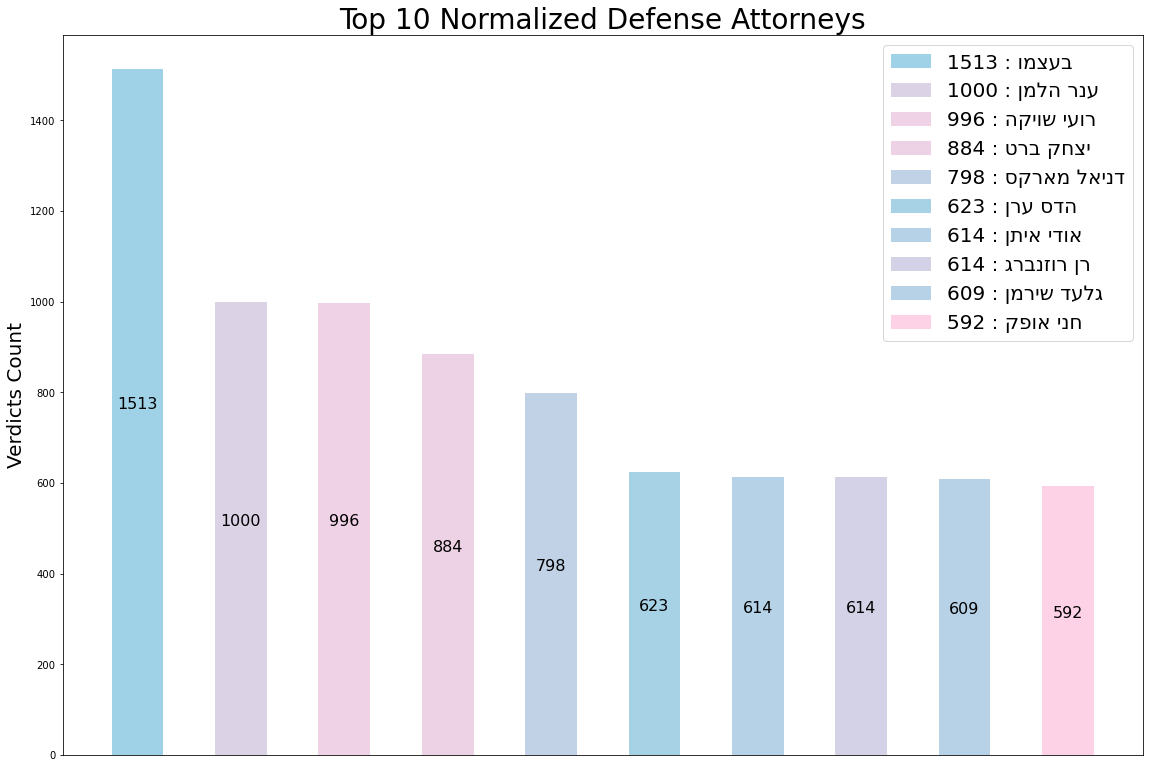

In [22]:
da_names,da_values = create_top_k_attenders(defense_attorneys_normalized,10)
plot(da_names,da_values,'Normalized Defense Attorneys')

Total Category Count


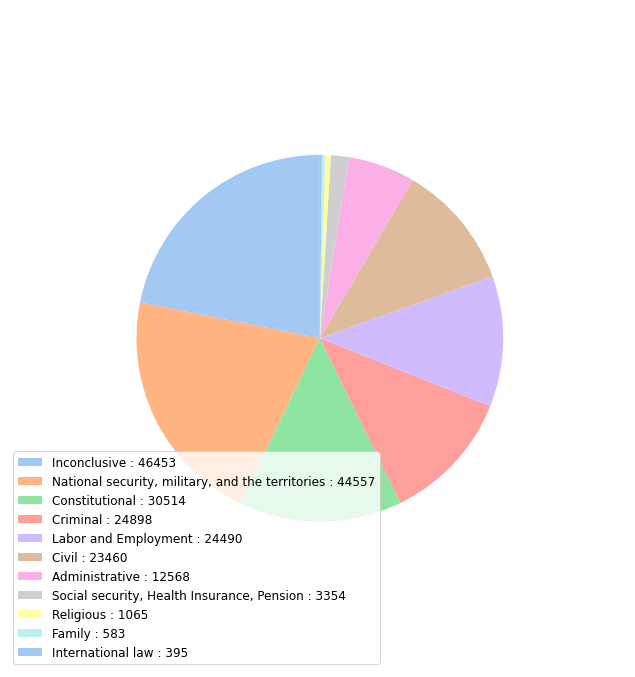

In [23]:
print('Total Category Count')
cat_cat = normalized.loc[:,'category']
dictionary = dict()
for ser in cat_cat:
    try:
        dictionary[ser] += 1
    except KeyError:
        dictionary[ser] = 0

new = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}
labels = list()
for key in new.keys():
    string = f'{key} : {new[key]}'
    labels.append(string)
sizes = new.values()
colors = sns.color_palette('pastel')[0:10]
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best",prop={'size': 12})
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()


In [24]:
petitioner_cat = not_normalized.loc[:,['category', 'petitioner']]
defense_cat = not_normalized.loc[:,['category','defense']]
judges_cat = not_normalized.loc[:,['category','judges']]
petitioner_attorneys_cat = not_normalized.loc[:,['category','petitioner_attorneys']]
defense_attorneys_cat = not_normalized.loc[:,['category','defense_attorneys']]

In [25]:
petitioner_normalized_cat = normalized.loc[:,['category', 'petitioner_normalized']]
defense_normalized_cat = normalized.loc[:,['category','defense_normalized']]
judges_normalized_cat = normalized.loc[:,['category','judges_normalized']]
petitioner_attorneys_normalized_cat = normalized.loc[:,['category','petitioner_attorneys_normalized']]
defense_attorneys_normalized_cat = normalized.loc[:,['category','defense_attorneys_normalized']]

In [26]:
def trim_df(series,df,names,col):
    

    new_names = [name[::-1] for name in names]
    dictionary = dict()
    flag = False
    
    for idx,row in series.items():
        
        cur_list = list()
        cur_elements = row
        
        if cur_elements != None:
            for elem in cur_elements:
                if elem != None:
                    if elem != '':
                        
                        for name in new_names:
                            
                            if elem == name:
                                flag = True
                                cur_list.append(elem)
                                break
                                
            if flag == True:
                dictionary[idx] = cur_list
            
            flag = False
    
    trimmed = pd.DataFrame(index=dictionary.keys(),data=dictionary.values())
    trimmed['category'] = df.loc[trimmed.index,['category']]
    #trimmed.reset_index(drop=True, inplace=True)
    categories = ['Family','Labor and Employment','Constitutional','Administrative','Civil','Criminal','International law','National security, military, and the territories','Religious','Social security, Health Insurance, Pension','Inconclusive']
    new_columns = new_names + categories
    new_df = pd.DataFrame(columns=new_columns,index=trimmed.index)
    
    for idx in trimmed.index:
        for col in trimmed.columns:
            new_df.at[idx,trimmed.at[idx,col]] = True
    
    new_df.fillna(False,inplace=True)
    new_df.drop(columns=[None],inplace=True)
    
    return new_df

In [27]:
jn = trim_df(judges,judges_cat,jn_names,'judges')
pn = trim_df(petitioner,petitioner_cat,pn_names,'petitioner')
pan = trim_df(petitioner_attorneys,petitioner_attorneys_cat,pan_names,'petitioner_attorneys')
dn = trim_df(defense,defense_cat,dn_names,'defense')
dan = trim_df(defense_attorneys,defense_attorneys_cat,dan_names,'defense_attorneys')

In [28]:
j = trim_df(judges_normalized,judges_normalized_cat,j_names,'judges_normalized')
p = trim_df(petitioner_normalized,petitioner_normalized_cat,p_names,'petitioner_normalized')
pa = trim_df(petitioner_attorneys_normalized,petitioner_attorneys_normalized_cat,pa_names,'petitioner_attorneys_normalized')
d = trim_df(defense_normalized,defense_normalized_cat,d_names,'defense_normalized')
da = trim_df(defense_attorneys_normalized,defense_attorneys_normalized_cat,da_names,'defense_attorneys_normalized')

In [29]:
def top_k_correlated(df,k):
    corr = df.corr()
    #categories = ['Family','Labor and Employment','Constitutional','Administrative','Civil','Criminal','International law','National security, military, and the territories','Religious','Social security, Health Insurance, Pension']
    #corr.drop(categories,inplace=True,axis=0)
    
    pos = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
    neg = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=True))
    return pos[0:k],neg[0:k]

In [56]:
def print_top_k(p_series,n_series,role,k):
    print(f'Top {k} {role}')
    table = [pd.DataFrame(p_series),pd.DataFrame(n_series)]
    print(tabulate(table,tablefmt="pretty"))
    print()

In [58]:
k = 40

In [59]:
pcjn,ncjn = top_k_correlated(jn,k)
pcj,ncj = top_k_correlated(j,k)

pcpn,ncpn = top_k_correlated(pn,k)
pcp,ncp = top_k_correlated(p,k)

pcpan,ncpan = top_k_correlated(pan,k)
pcpa,ncpa = top_k_correlated(pa,k)

pcdn,ncdn = top_k_correlated(dn,k)
pcd,ncd = top_k_correlated(d,k)

pcdan,ncdan = top_k_correlated(dan,k)
pcda,ncda = top_k_correlated(da,k)

In [60]:
print_top_k(pcjn,ncjn,'Not Normalized Judges',k)
print_top_k(pcj,ncj,'Normalized Judges',k)

print_top_k(pcpn,ncpn,'Not Normalized Petitioners',k)
print_top_k(pcp,ncp,'Normalized Petitioners',k)

print_top_k(pcpan,ncpan,'Not Normalized Petitioners Attorneys',k)
print_top_k(pcpa,ncpa,'Normalized Petitioners Attorneys',k)

print_top_k(pcdn,ncdn,'Not Normalized Defense',k)
print_top_k(pcd,ncd,'Normalized Defense',k)

print_top_k(pcdan,ncdan,'Not Normalized Defense Attorneys',k)
print_top_k(pcda,ncda,'Normalized Defense Attorneys',k)

Top 40 Not Normalized Judges
+----------------------------------------------------------------------------------------------------------------+
|                  ד' ביניש       Labor and Employment                                0.137009                   |
|                                 Constitutional                                      0.111086                   |
|                  ס' ג'ובראן     Criminal                                            0.099464                   |
|                  י' עמית        Civil                                               0.098333                   |
|                  ע' פוגלמן      Administrative                                      0.091881                   |
|                                 National security, military, and the territories    0.087427                   |
|                  א' חיות        מ' נאור                                             0.085539                   |
|                  א' גרוניס      Inconclusive     

In [34]:
def plot_correlation(df,title):
    columns=list()
    for col in df.columns:
        if any("\u0590" <= c <= "\u05EA" for c in col):
            rev_col = col[::-1]
            columns.append(rev_col)
        else:
            columns.append(col)
    
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr = df.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    heatmap=sns.heatmap(corr, mask=mask,  vmax=.3, vmin=-.3,center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    heatmap.set_xticklabels(columns)
    heatmap.set_yticklabels(columns)
    heatmap.set_title(f'Correlation Heatmap - {title}', fontdict={'fontsize':25}, pad=25)

In [35]:
def plot_corr_mat(df,role):    
    columns=list()
    for col in df.columns:
        if any("\u0590" <= c <= "\u05EA" for c in col):
            rev_col = col[::-1]
            columns.append(rev_col)
        else:
            columns.append(col)
    
    sns.set_theme(style="white")
    sns.set_context("paper", font_scale=3)
    
    plt.figure(figsize=(30, 15))
    corr = df.corr()
    
    
    # Generate a mask for the upper triangle
    maskk = np.triu(np.ones_like(corr, dtype=bool))
    
    # Generate a custom diverging colormap
    cmapp = sns.diverging_palette(230, 20, as_cmap=True)
    
    heatmap = sns.heatmap(corr,mask=maskk,cmap=cmapp, vmin=-.3, vmax=.3, annot=True,square = True, 
                          linewidths=1, cbar_kws={"shrink": 1}, annot_kws={'size': 17, 'weight': 'bold'})
    heatmap.set_xticklabels(columns)
    heatmap.set_yticklabels(columns)
    heatmap.set_title(f'Correlation Heatmap - {role}', fontdict={'fontsize':25}, pad=25)
    
    for t in heatmap.texts:
        if float(t.get_text())>=0.1 or float(t.get_text())<=-0.1:
            t.set_text(t.get_text()) 
        else:
            t.set_text("") 

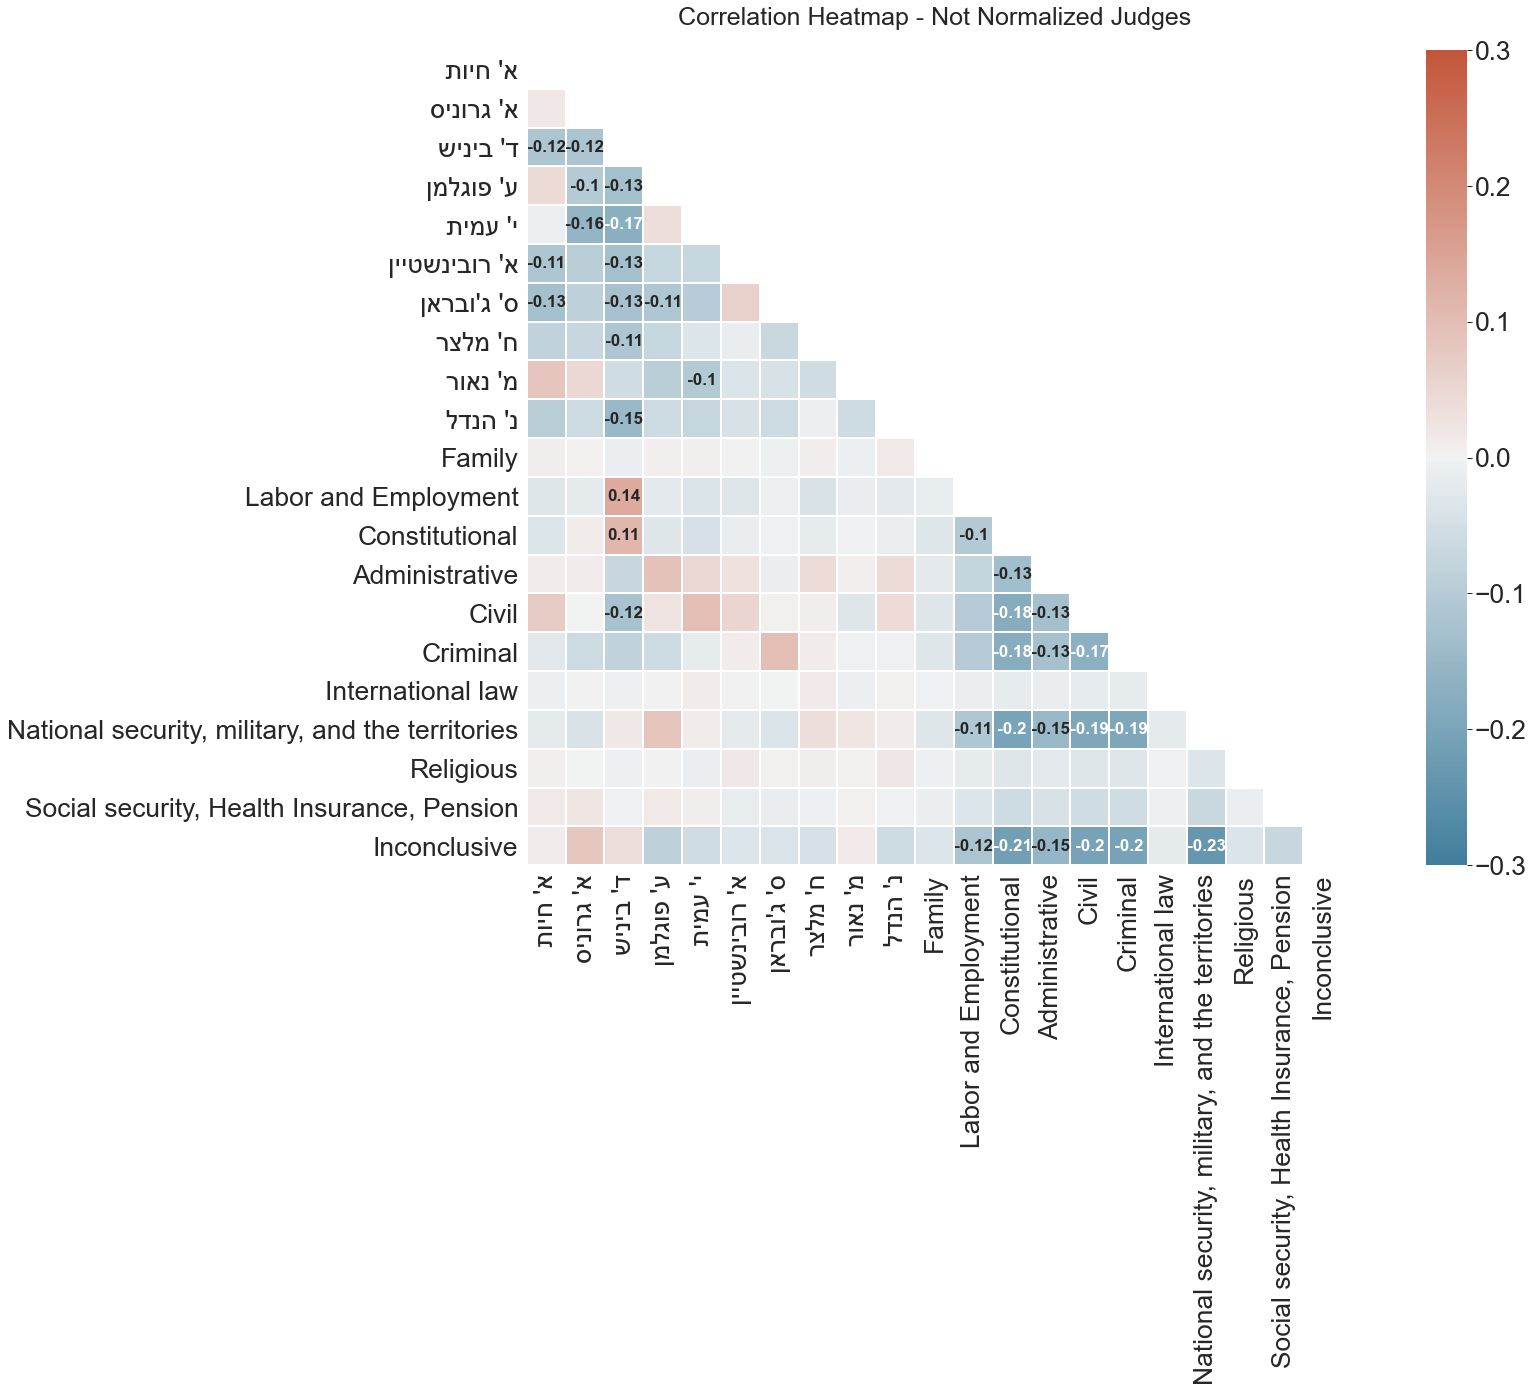

In [36]:
plot_corr_mat(jn,'Not Normalized Judges')

In [37]:
#plot_correlation(jn,'Not Normalized Judges')

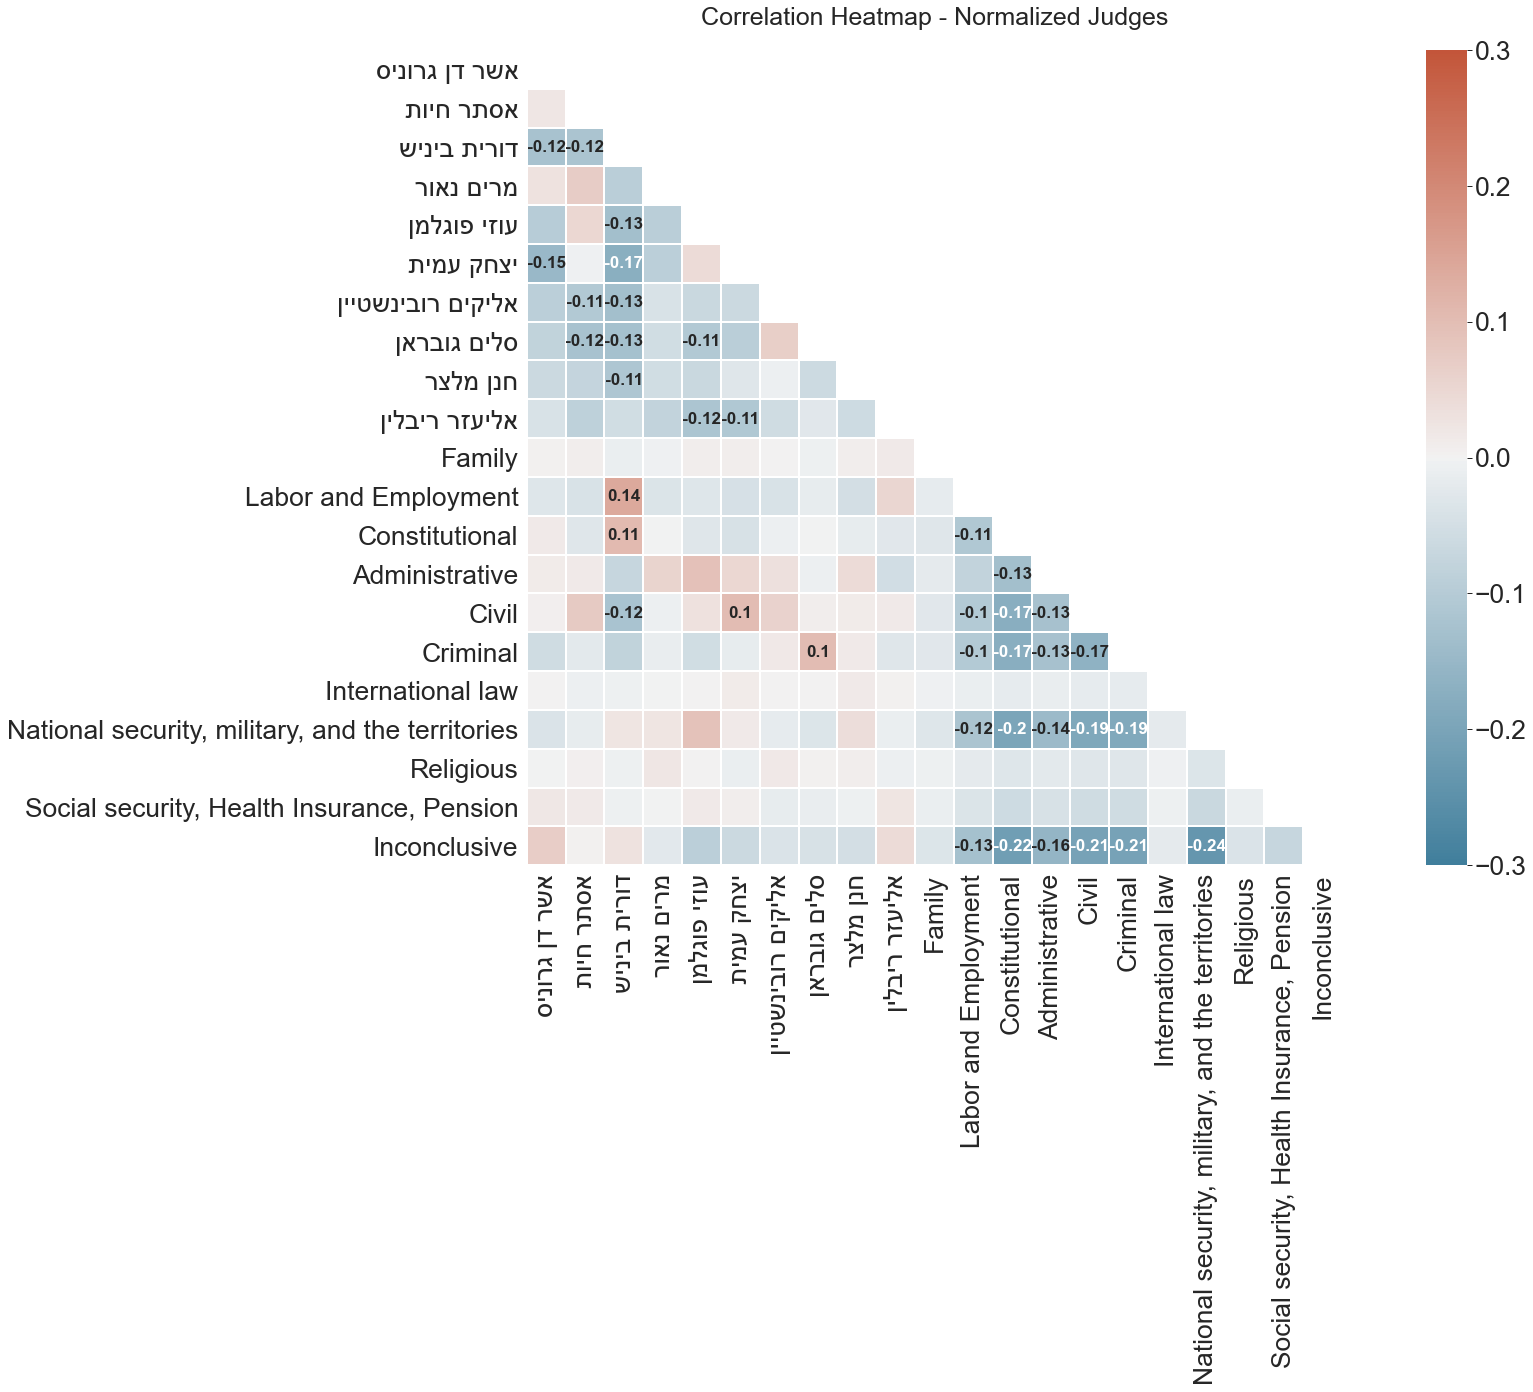

In [38]:
plot_corr_mat(j,'Normalized Judges')

In [39]:
#plot_correlation(j,'Normalized Judges')

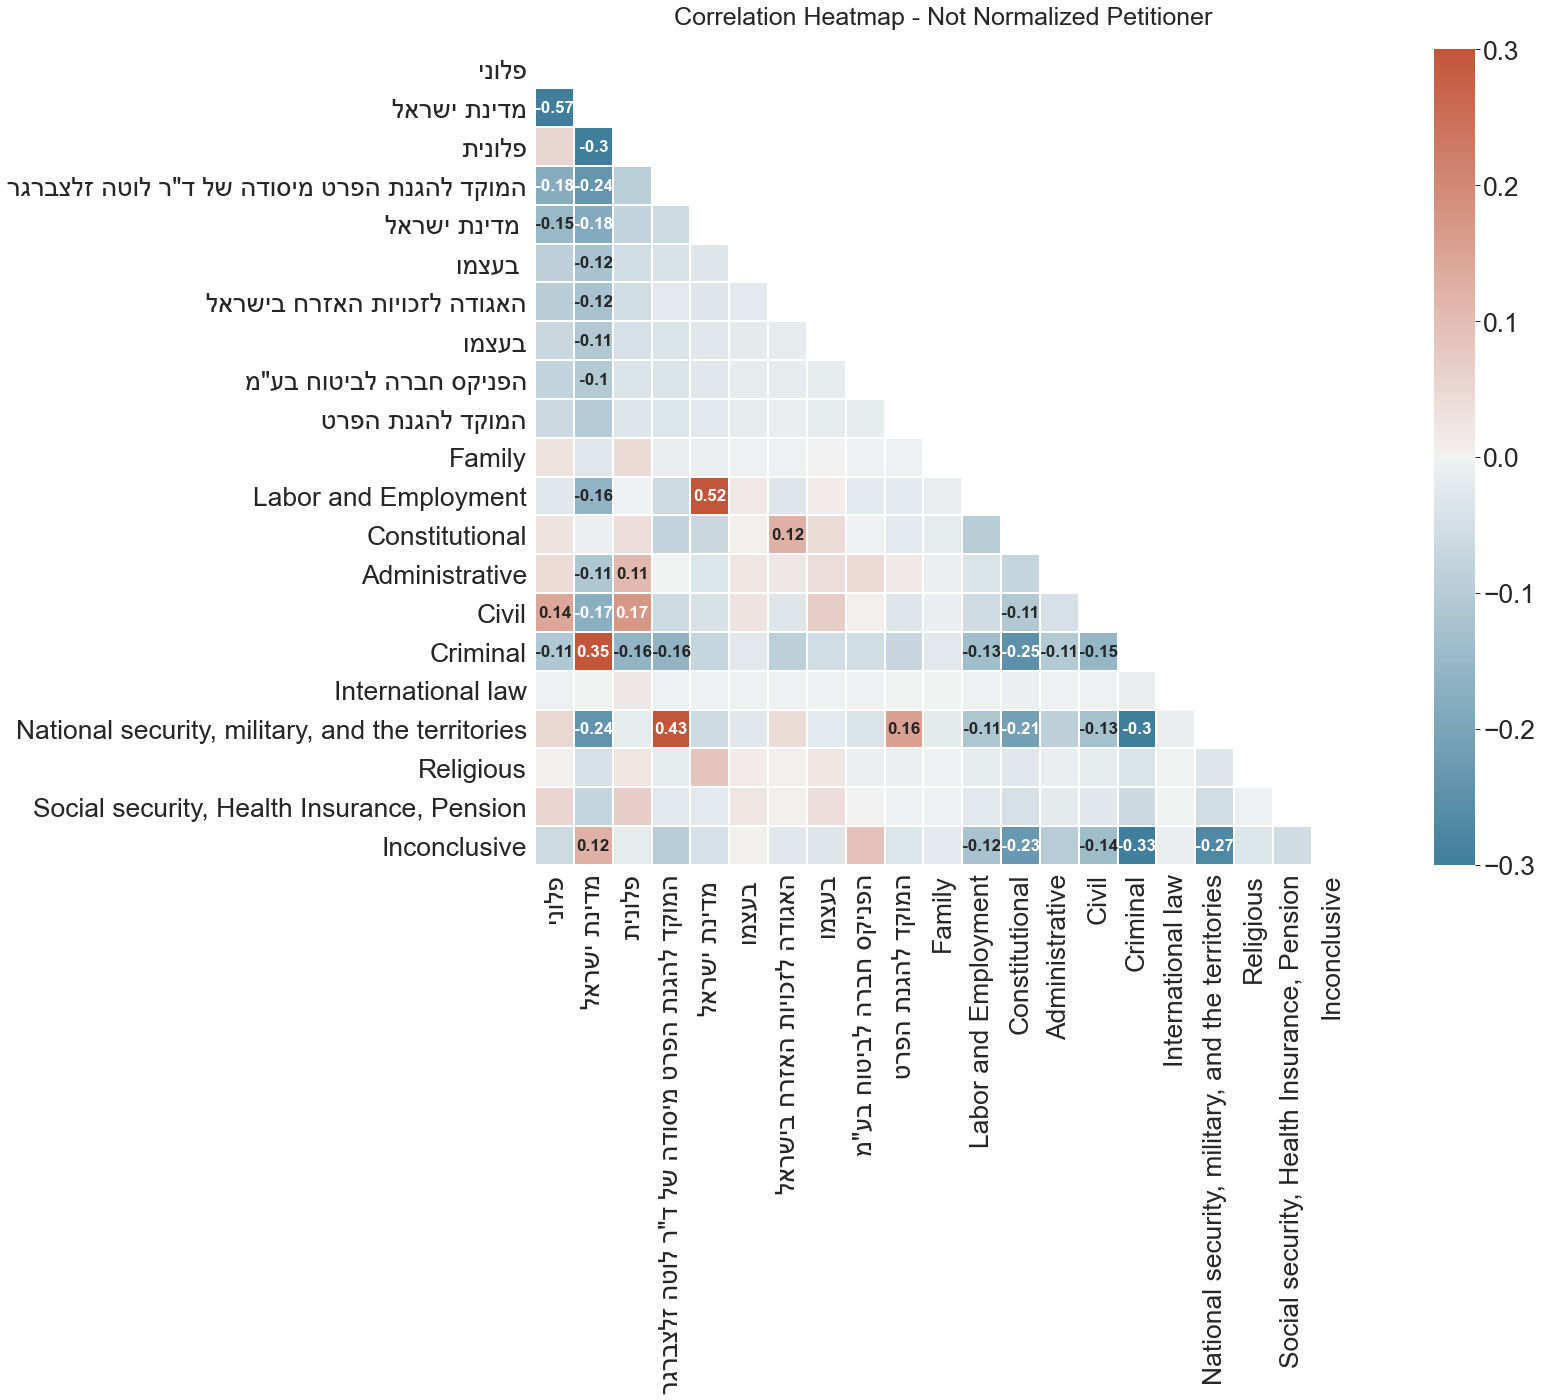

In [40]:
plot_corr_mat(pn,'Not Normalized Petitioner')

In [41]:
#plot_correlation(pn,'Not Normalized Petitioner')

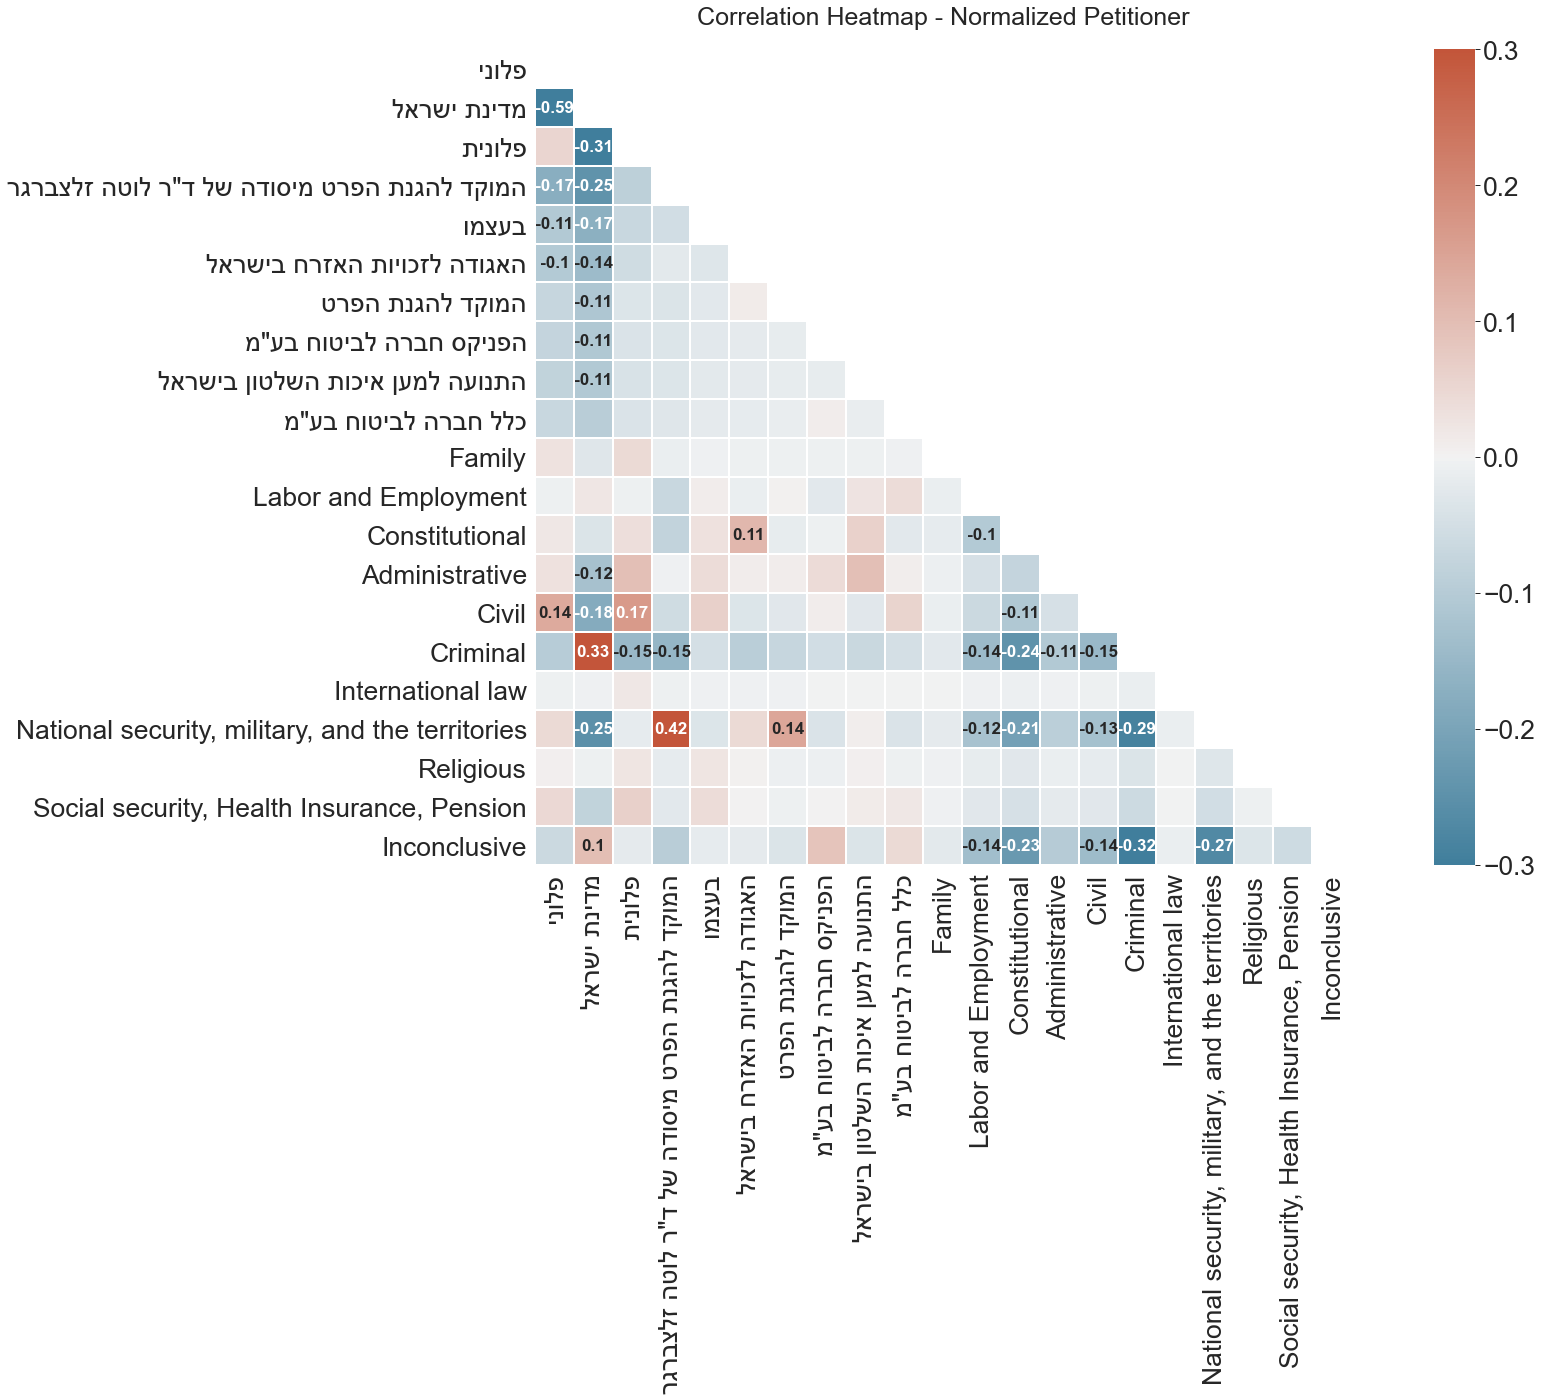

In [42]:
plot_corr_mat(p,'Normalized Petitioner')

In [43]:
#plot_correlation(p,'Normalized Petitioner')

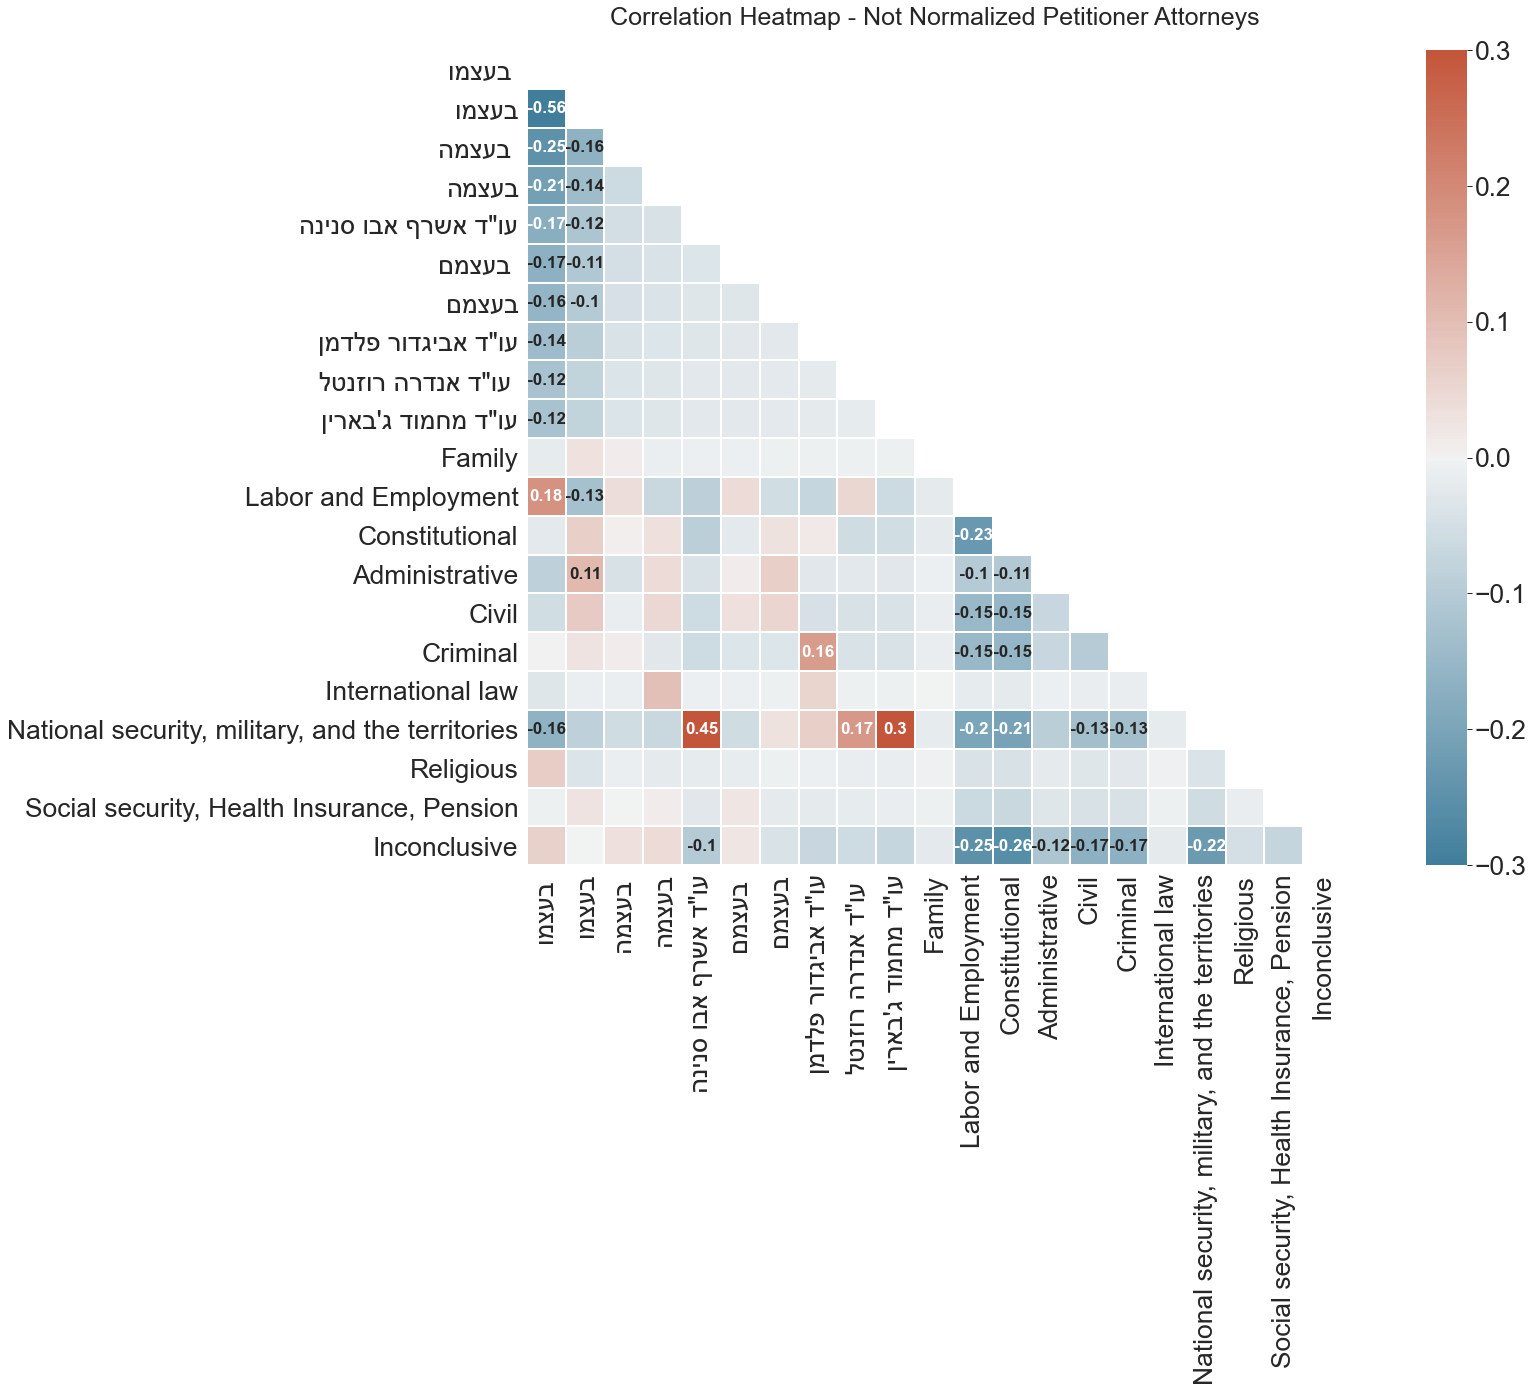

In [44]:
plot_corr_mat(pan,'Not Normalized Petitioner Attorneys')

In [45]:
#plot_correlation(pan,'Not Normalized Petitioner Attorneys')

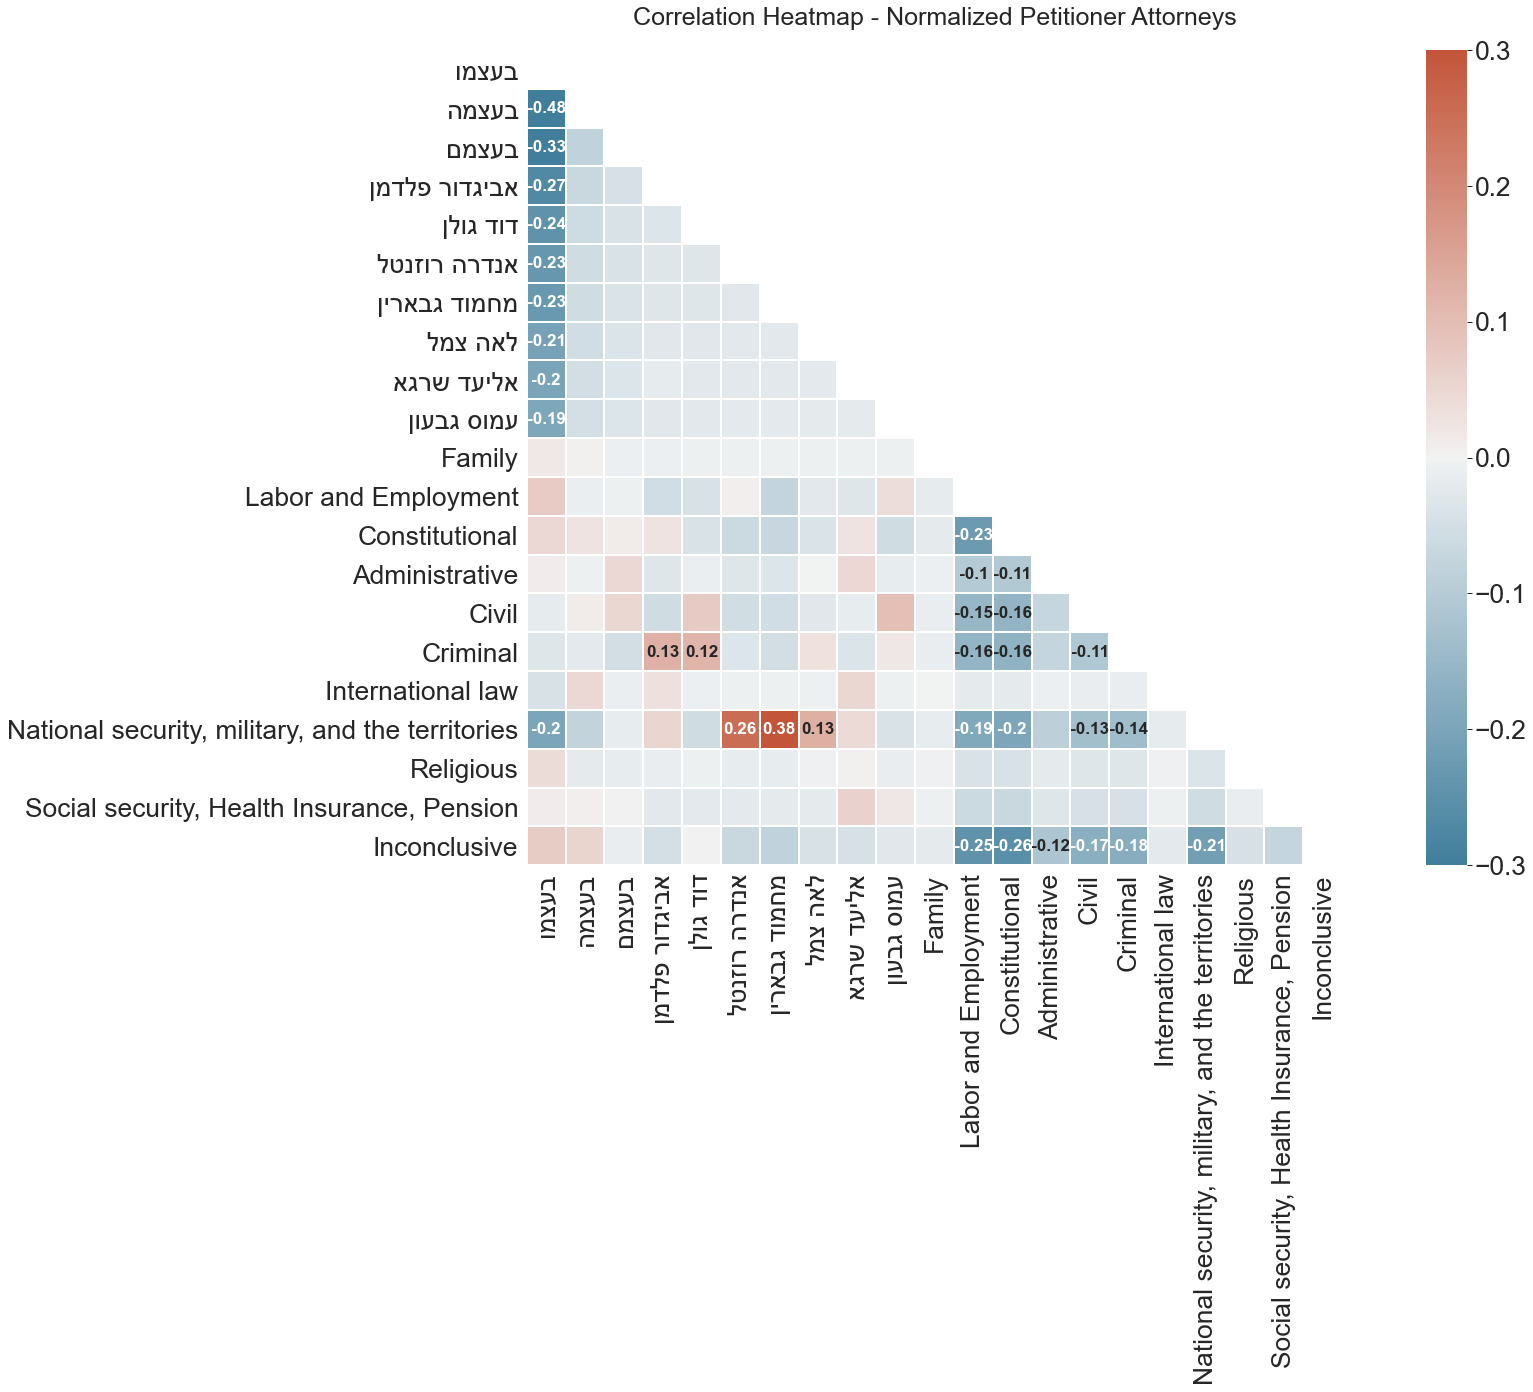

In [46]:
plot_corr_mat(pa,'Normalized Petitioner Attorneys')

In [47]:
#plot_correlation(pa,'Normalized Petitioner Attorneys')

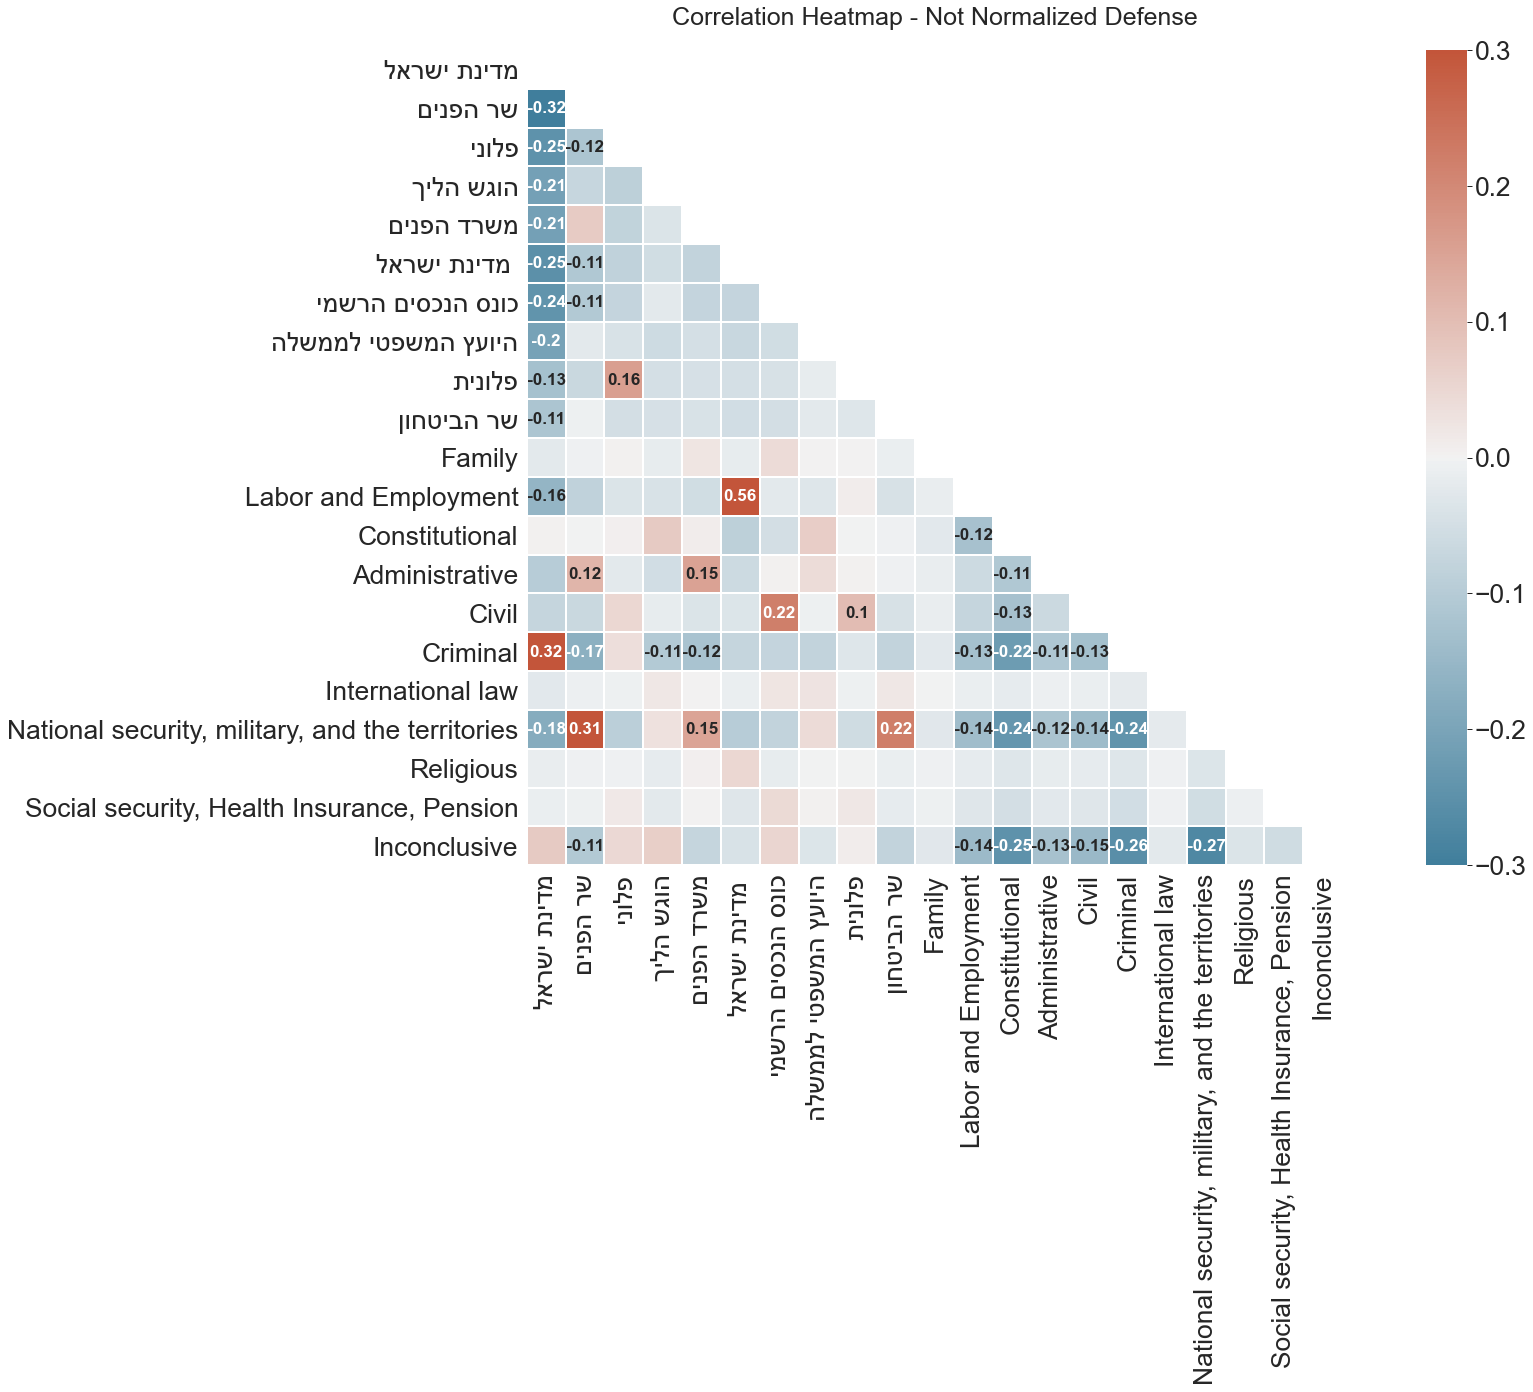

In [48]:
plot_corr_mat(dn,'Not Normalized Defense')

In [49]:
#plot_correlation(dn,'Not Normalized Defense')

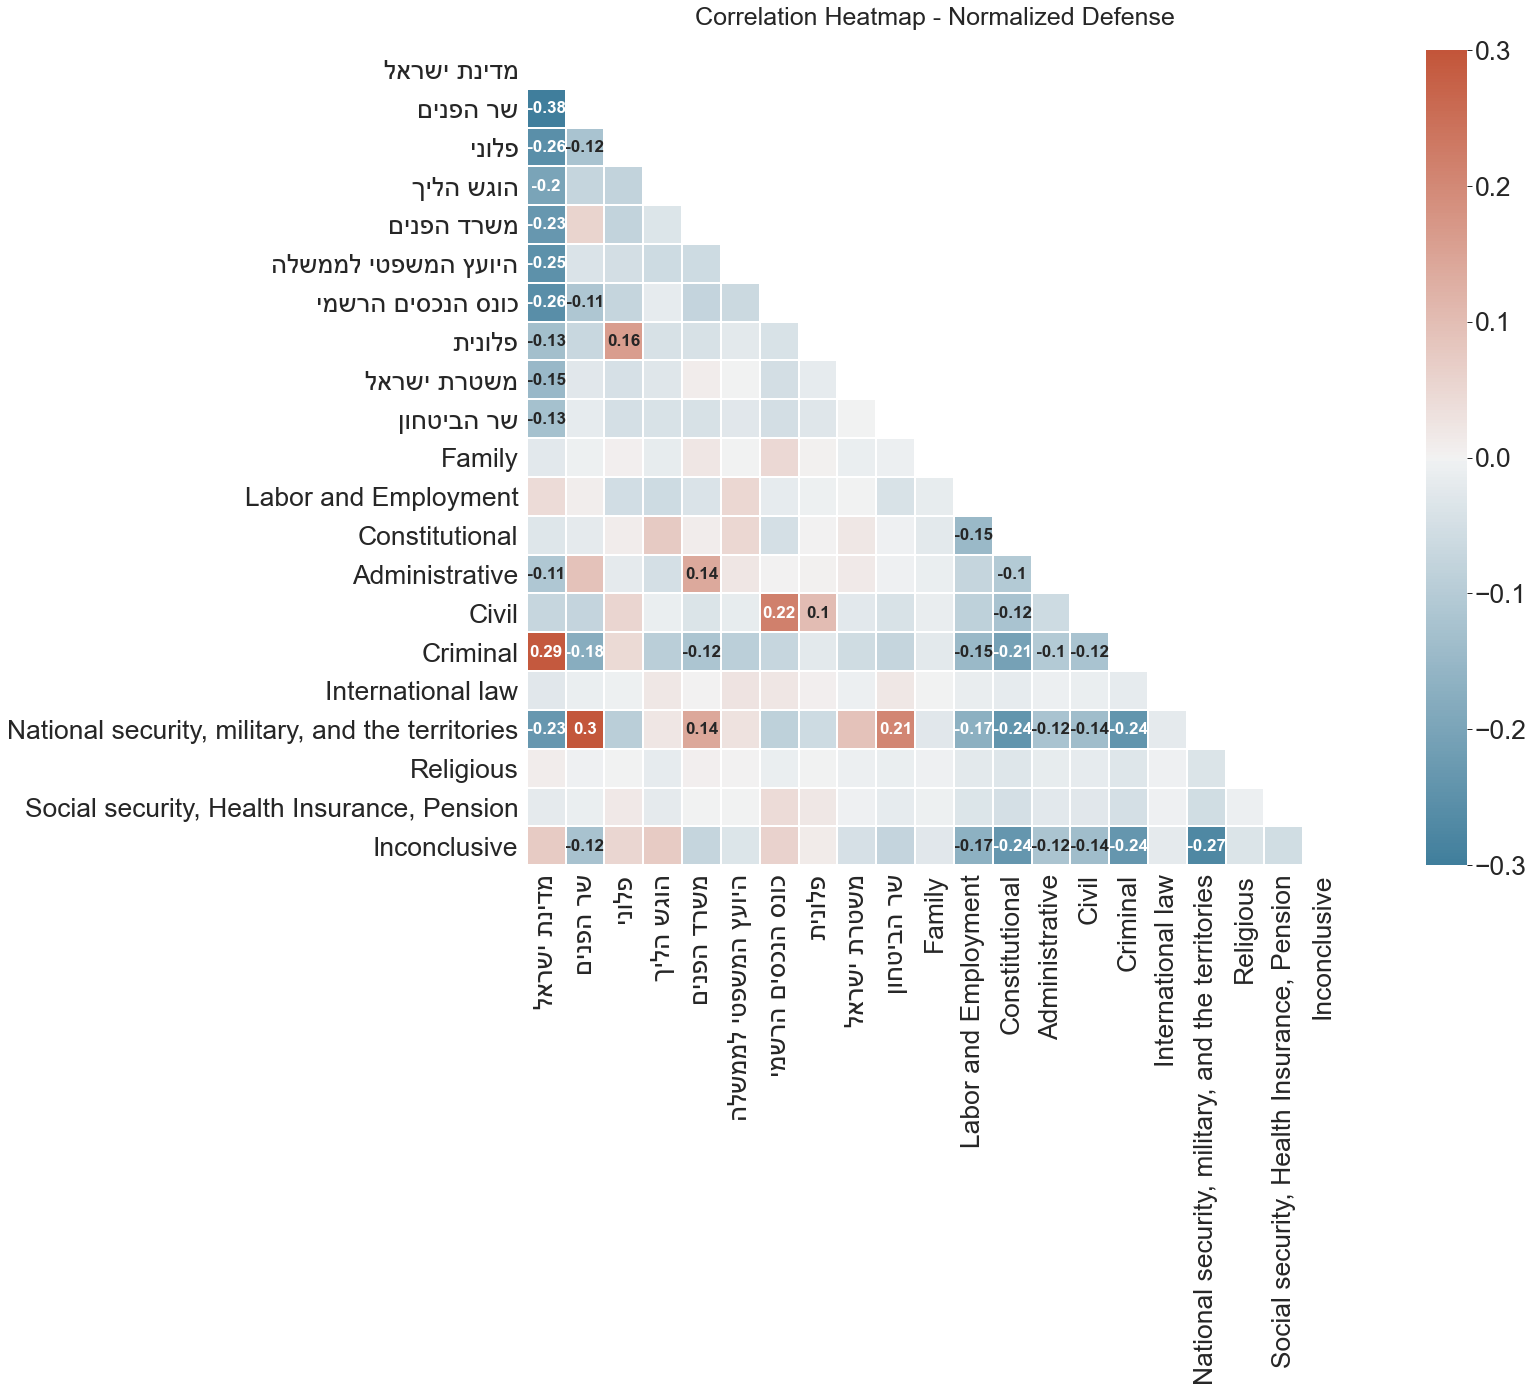

In [50]:
plot_corr_mat(d,'Normalized Defense')

In [51]:
#plot_correlation(d,'Normalized Defense')

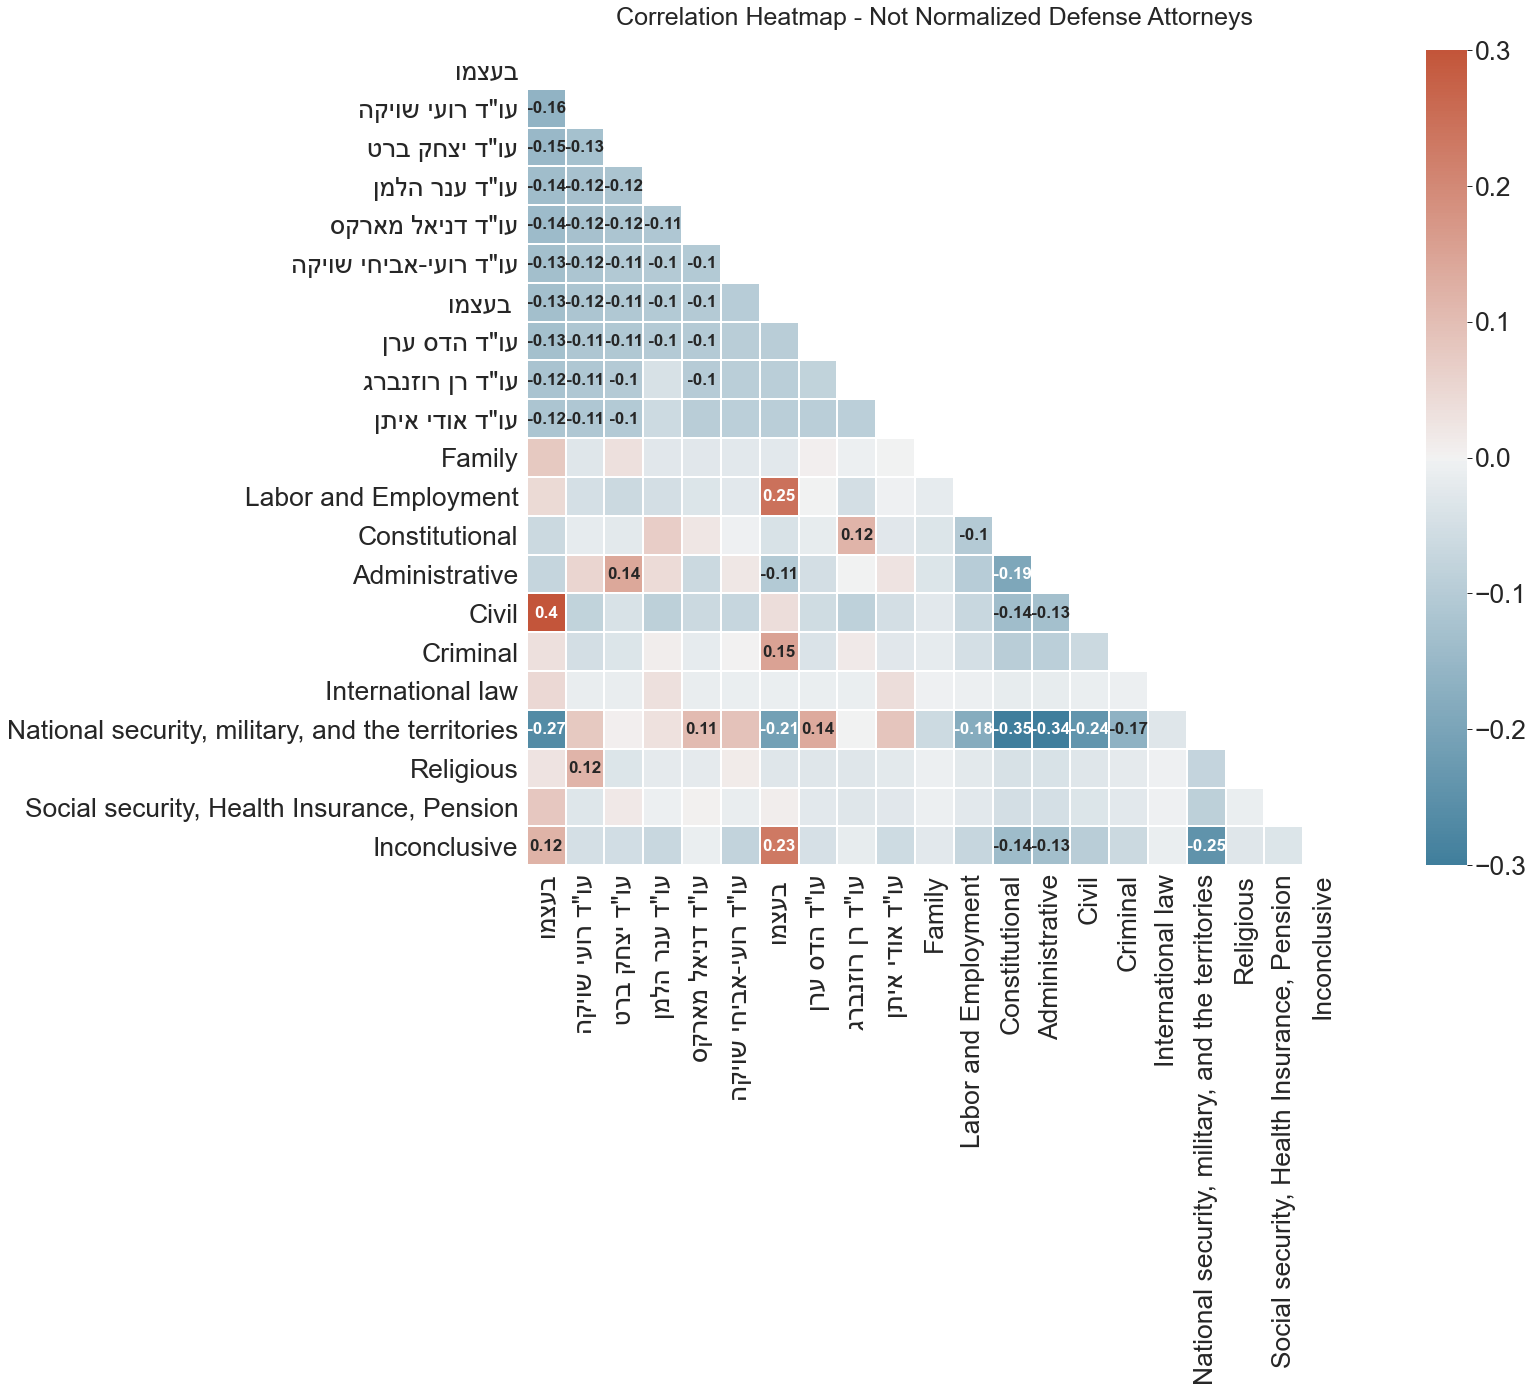

In [52]:
plot_corr_mat(dan,'Not Normalized Defense Attorneys')

In [53]:
#plot_correlation(dan,'Not Normalized Defense Attorneys')

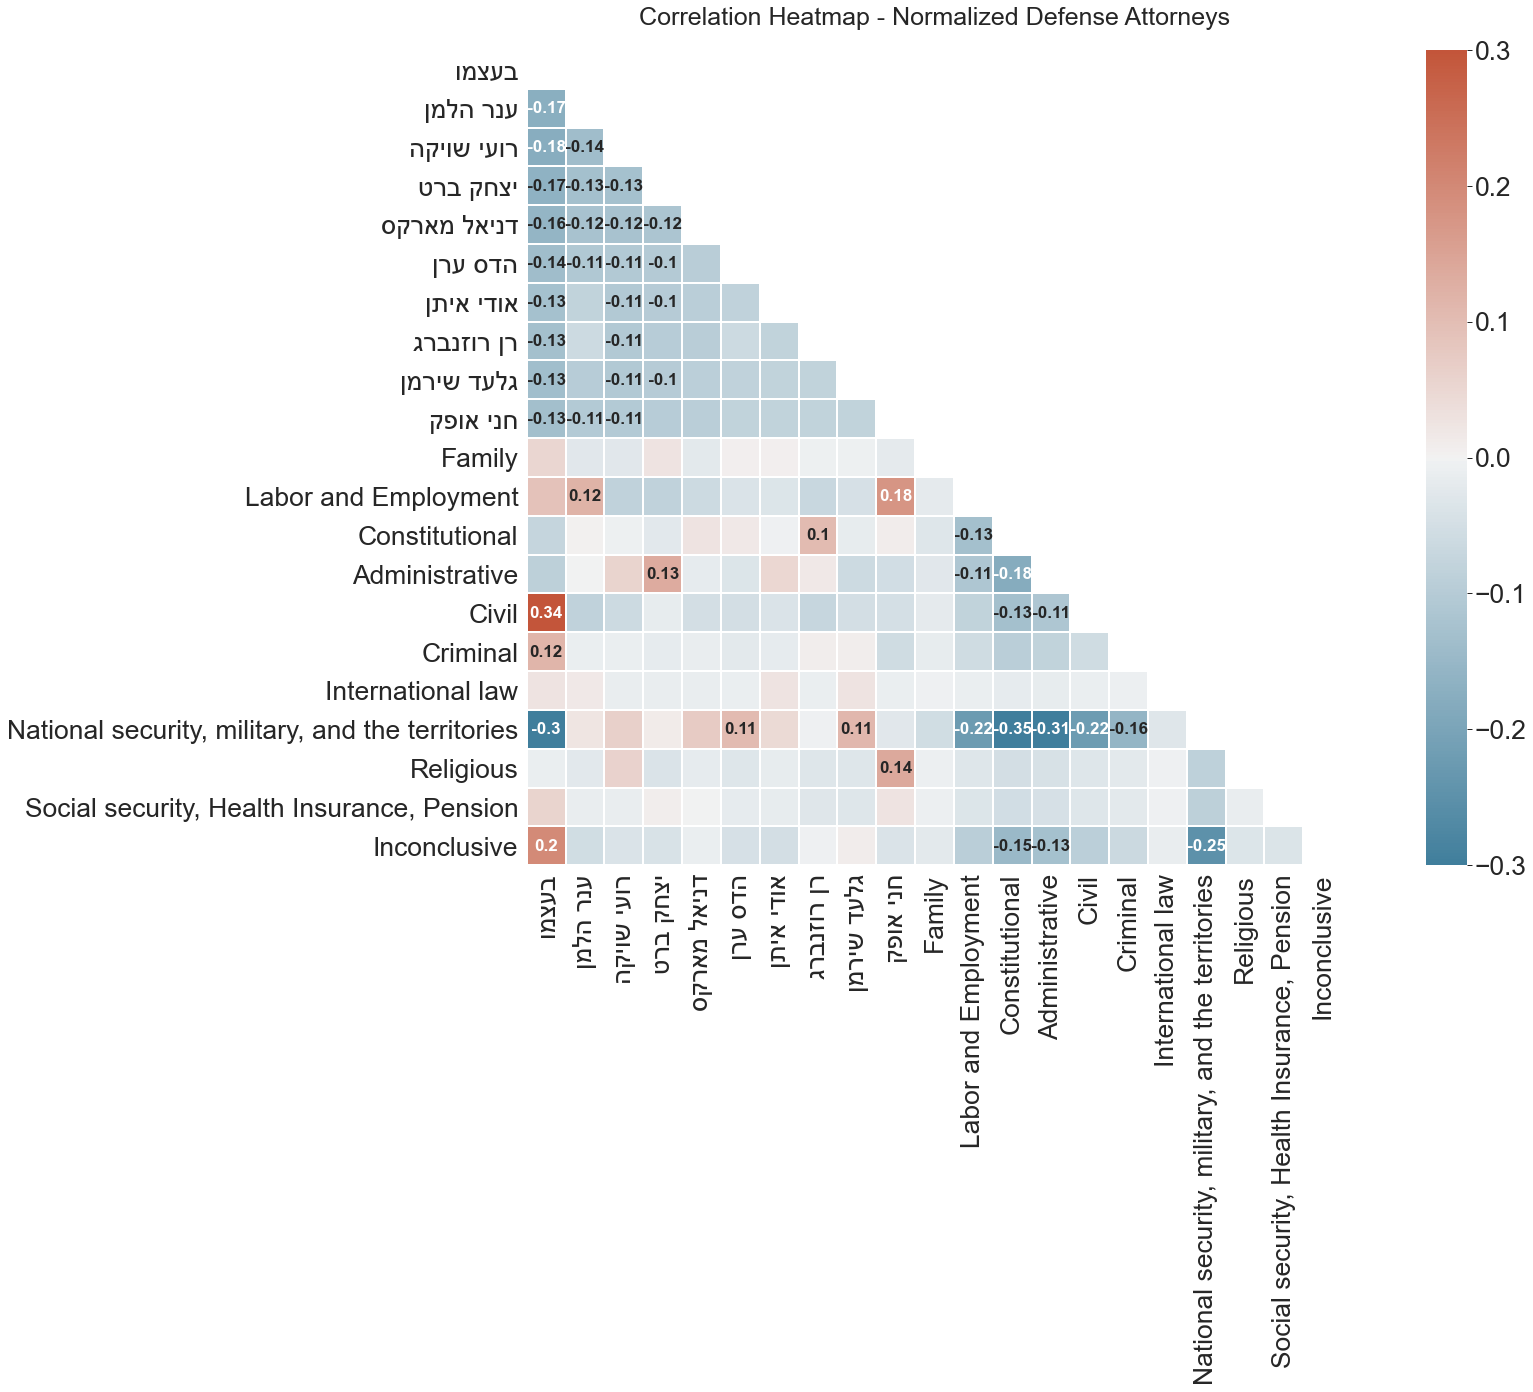

In [54]:
plot_corr_mat(da,'Normalized Defense Attorneys')

In [55]:
#plot_correlation(da,'Normalized Defense Attorneys')